In [157]:
import sys
!{sys.executable} -m pip install mlxtend


You should consider upgrading via the 'C:\Users\akash\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [158]:
# linear algebra
import numpy as np

# data processing
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

In [159]:
#Provides the previous and current data record of a list with respect to index
def neighbor(iterable):
    iterator = iter(iterable)
    previous_item = None
    current_item = next(iterator)
    for next_item in iterator:
        yield(previous_item, current_item)
        previous_item = current_item
        current_item = next_item
    yield(previous_item, current_item)

#Utilities used in Pre-processing of the data
def ReativeFeature(dataFrame, feature):
    new_feature = "Relative_" + feature 
    dataFrame[new_feature] = np.nan
    states = dataFrame.State.unique()
    for state in states:
        df_state = dataFrame[dataFrame['State'] == state]
        feature_state = df_state[feature].tolist()
        diff_feature =[]
        for previous, current in neighbor(feature_state):
            if(previous== None):
                diff_feature.append(1)
            else:
                diff_feature.append((current - previous))
        dataFrame.loc[(dataFrame['State'] == state), new_feature] = diff_feature
    return dataFrame
                 

## [CM1] Loading Covid Dataset and Data Cleaning / Preprocessing

In [160]:
df = pd.read_csv('dkmacovid_train.csv')

df.sample(10)

Day  State ID          State      Lat    Long_   Active  Incident_Rate  \
631    15        36           Ohio  40.3888 -82.7649   134937    6967.533856   
1177   27        30  New Hampshire  43.4525 -71.5639     5214    4674.743383   
366     9        50      Wisconsin  44.2685 -89.6165    72182    9414.172836   
571    14        22  Massachusetts  42.2302 -71.5301   116766    6592.699343   
745    18        10        Florida  27.7663 -81.6868  1555007    7353.107080   
1107   26         4       Arkansas  34.9697 -92.3731    18189    9516.423200   
421    11         8       Delaware  39.3185 -75.5071    45990    6760.056852   
528    13        25    Mississippi  32.7416 -89.6787    39696    8195.120607   
608    15        11        Georgia  33.0406 -83.6431   788992    7545.427925   
358     9        39   Pennsylvania  40.5908 -77.2098   179161    5602.855931   

      Total_Test_Results  Case_Fatality_Ratio  Testing_Rate  \
631              8368521             1.234833   71592.51782   
1177             1224489             1.582682   90055.09259   
366              5585041             1.015628   95922.78762   
571             12046398             2.956193  174775.37550   
745             17728996             1.537029   82545.92185   
1107             2368680             1.633082   78490.18690   
421              1063800             1.497866  109246.18290   
528              1466825             2.179181   49286.00685   
608              5844021             1.515110   55041.80252   
358              8048586             2.457349   31877.10128   

     Resident Population 2020 Census Population Density 2020 Census  \
631                       11,799,448                          288.8   
1177                       1,377,529                          153.8   
366                        5,893,718                          108.8   
571                        7,029,917                          901.2   
745                       21,538,187                          401.4   
1107                       3,011,524                           57.9   
421                          989,948                            508   
528                        2,961,279                           63.1   
608                       10,711,908                          185.6   
358                       13,002,700                          290.6   

      Density Rank 2020 Census  SexRatio  Confirmed  Deaths  Recovered  
631                         12        96       True    True       True  
1177                        23        98       True    True       True  
366                         27        99       True    True       True  
571                          5        94       True    True       True  
745                         10        96       True    True      False  
1107                        36        96       True    True       True  
421                          8        94       True    True      False  
528                         34        94       True    True      False  
608                         19        95       True    True      False  
358                         11        96       True    True       True

In [161]:
df.describe()

Day     State ID          Lat        Long_        Active  \
count  1380.000000  1380.000000  1380.000000  1380.000000  1.380000e+03   
mean     16.500000    25.239130    39.470717   -92.879928  2.610390e+05   
std       8.658579    14.513405     6.070494    19.632514  4.914059e+05   
min       2.000000     1.000000    21.094300  -157.498300  9.550000e+02   
25%       9.000000    12.000000    35.630100  -105.311100  2.731600e+04   
50%      16.500000    25.500000    39.583950   -88.259400  1.005915e+05   
75%      24.000000    37.000000    43.326600   -77.209800  2.592418e+05   
max      31.000000    51.000000    61.370700   -69.381900  3.283336e+06   

       Incident_Rate  Total_Test_Results  Case_Fatality_Ratio   Testing_Rate  \
count    1380.000000        1.380000e+03          1380.000000    1380.000000   
mean     7203.192905        5.271097e+06             1.631757   91763.237514   
std      2305.025102        6.991478e+06             0.656702   40858.185997   
min      1232.233261        3.739460e+05             0.439598   30524.071590   
25%      6042.134459        1.310515e+06             1.246993   67457.197525   
50%      7453.675955        2.919566e+06             1.499993   85438.613770   
75%      8621.924085        6.093790e+06             1.817013  104509.453475   
max     12811.162350        4.227902e+07             3.928767  235733.711200   

       Density Rank 2020 Census     SexRatio  
count               1380.000000  1380.000000  
mean                  27.173913    97.760870  
std                   15.378197     3.219219  
min                    1.000000    94.000000  
25%                   13.000000    95.000000  
50%                   28.500000    97.000000  
75%                   41.000000    99.000000  
max                   52.000000   109.000000

In [162]:
df.shape

(1380, 17)

In [163]:
df.columns

Index(['Day', 'State ID', 'State', 'Lat', 'Long_', 'Active', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'Resident Population 2020 Census', 'Population Density 2020 Census',
       'Density Rank 2020 Census', 'SexRatio', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [164]:
#display basic information about the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Day                              1380 non-null   int64  
 1   State ID                         1380 non-null   int64  
 2   State                            1380 non-null   object 
 3   Lat                              1380 non-null   float64
 4   Long_                            1380 non-null   float64
 5   Active                           1380 non-null   int64  
 6   Incident_Rate                    1380 non-null   float64
 7   Total_Test_Results               1380 non-null   int64  
 8   Case_Fatality_Ratio              1380 non-null   float64
 9   Testing_Rate                     1380 non-null   float64
 10  Resident Population 2020 Census  1380 non-null   object 
 11  Population Density 2020 Census   1380 non-null   object 
 12  Density Rank 2020 Ce

In [165]:
#display number of samples of each class
df['Confirmed'].value_counts()

True     1329
False      51
Name: Confirmed, dtype: int64

In [166]:
df['Deaths'].value_counts()

True     1244
False     136
Name: Deaths, dtype: int64

In [167]:
df['Recovered'].value_counts()

True     864
False    516
Name: Recovered, dtype: int64

## Feature Description

##### • Day: Date in January 2021 ranging from Jan 2 to Jan 31.
##### • State ID: Arbitrary ID number for each state, based on alphabetical order. Note there are 51 states since the District of Columbia is also included.
##### • State: Name of the US State.
##### • Lat: Latitude for the geographic centre of the state.
##### • Long : Longitude for the geographic centre of the state.
##### • Active: Number of active, tracked COVID-19 cases that day in that state.
##### • Incident Rate: cases per 100,000 persons
##### • Total Test Results: Total number of people who have been tested
##### • Case Fatality Ratio(%):  Number recorded deaths / Number cases.
##### • Testing Rate: Total test results per 100,000 persons
##### • Resident Population 2021 Census: see original data source
##### • Population Density 2021 Census: see original data source
##### • Density Rank 2021 Census: see original data source
##### • SexRatio: see original data source

# Preprocessing / cleaning the Covid Dataset

#### Preprocessing Steps: 
1.	Checking for Missing values in Columns.
2.	Checking for duplicate records and dropping it if any.
3.	Removing features that are highly dependent upon each other. In Covid Dataset we have [State ID], so we do not need [State, Long, Lat] and dropping these features. 
4.	Type Casting the [Resident Population 2020 Census] and [Population Density 2020 Census] data into float data type.
5.  Adding the relative difference of specific quanititative attributes with respect to the state.
6.	One Hot Encoding of [Day] & [State ID] allows the representation of data to be more expressive. It is used to convert categorical data to integer data.
7.	Checking for outliers - Data point that differs significantly from other observations.By plotting Histograms, we look at data distribution for a variable and find values that fall outside the distribution.
8.	Performing Z Score Regularization - score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. If the Z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.
#### Outliers Removal: -
Removing those rows that have [Incident_Rate] greater than 2.5 Z-Score value or lesser than -2.5 Z-Score value
Removing those rows that have [Case_Fatality_Ratio] greater than 3 Z-Score value or lesser than -3 Z-Score value.

In [168]:
df

Day  State ID          State      Lat     Long_   Active  Incident_Rate  \
0       2         1        Alabama  32.3182  -86.9023   162449    7535.061394   
1       2         2         Alaska  61.3707 -152.4044    40421    6534.252848   
2       2         3        Arizona  33.7298 -111.4312   452222    7407.212013   
3       2         4       Arkansas  34.9697  -92.3731    24012    7669.219075   
4       2         5     California  36.1162 -119.6816  2362015    6045.109130   
...   ...       ...            ...      ...       ...      ...            ...   
1375   31        46        Vermont  44.0459  -72.7107     3537    1917.501751   
1376   31        47       Virginia  37.7693  -78.1700   457993    5913.864172   
1377   31        49  West Virginia  38.4912  -80.9545    21195    6751.734093   
1378   31        50      Wisconsin  44.2685  -89.6165    68537   10169.973590   
1379   31        51        Wyoming  42.7560 -107.3025     1313    8969.536543   

      Total_Test_Results  Case_Fatality_Ratio  Testing_Rate  \
0                1891468             1.318688   38576.31315   
1                1290349             0.449781  176386.82510   
2                5218721             1.680608   39916.14181   
3                2079788             1.611203   68917.26567   
4               33391442             1.111215   84509.14544   
...                  ...                  ...           ...   
1375              897351             1.454242  143808.78510   
1376             5234155             1.280560   61322.04732   
1377             1945579             1.672713  108561.35130   
1378             6177575             1.086567  106099.52810   
1379              634985             1.148097  109714.92450   

     Resident Population 2020 Census Population Density 2020 Census  \
0                          5,024,279                           99.2   
1                            733,391                            1.3   
2                          7,151,502                           62.9   
3                          3,011,524                           57.9   
4                         39,538,223                          253.7   
...                              ...                            ...   
1375                         643,077                           69.8   
1376                       8,631,393                          218.6   
1377                       1,793,716                           74.6   
1378                       5,893,718                          108.8   
1379                         576,851                            5.9   

      Density Rank 2020 Census  SexRatio  Confirmed  Deaths  Recovered  
0                           29        94       True   False      False  
1                           52       109       True    True      False  
2                           35        99       True    True       True  
3                           36        96       True    True       True  
4                           13        99       True    True      False  
...                        ...       ...        ...     ...        ...  
1375                        33        97       True    True       True  
1376                        16        97       True    True       True  
1377                        31        98       True    True       True  
1378                        27        99       True    True       True  
1379                        51       104       True   False       True  

[1380 rows x 17 columns]

In [169]:
#checking for null values
df.isnull().sum()

Day                                0
State ID                           0
State                              0
Lat                                0
Long_                              0
Active                             0
Incident_Rate                      0
Total_Test_Results                 0
Case_Fatality_Ratio                0
Testing_Rate                       0
Resident Population 2020 Census    0
Population Density 2020 Census     0
Density Rank 2020 Census           0
SexRatio                           0
Confirmed                          0
Deaths                             0
Recovered                          0
dtype: int64

In [170]:
#Checking for duplicate rows
duplicated = df.duplicated().sum()
if duplicated:
    print('Duplicates in the Covid dataset are: {}'.format(duplicated))
else:
    print('Dataset does not contain any duplicate values.')

Dataset does not contain any duplicate values.


In [171]:
# Getting the relative difference values for specific quantitative attributes with respect to the state
df = ReativeFeature(df, 'Active')
df = ReativeFeature(df, 'Case_Fatality_Ratio')
df = ReativeFeature(df, 'Incident_Rate')
df = ReativeFeature(df, 'Total_Test_Results')
df = ReativeFeature(df, 'Testing_Rate')

df

Day  State ID          State      Lat     Long_   Active  Incident_Rate  \
0       2         1        Alabama  32.3182  -86.9023   162449    7535.061394   
1       2         2         Alaska  61.3707 -152.4044    40421    6534.252848   
2       2         3        Arizona  33.7298 -111.4312   452222    7407.212013   
3       2         4       Arkansas  34.9697  -92.3731    24012    7669.219075   
4       2         5     California  36.1162 -119.6816  2362015    6045.109130   
...   ...       ...            ...      ...       ...      ...            ...   
1375   31        46        Vermont  44.0459  -72.7107     3537    1917.501751   
1376   31        47       Virginia  37.7693  -78.1700   457993    5913.864172   
1377   31        49  West Virginia  38.4912  -80.9545    21195    6751.734093   
1378   31        50      Wisconsin  44.2685  -89.6165    68537   10169.973590   
1379   31        51        Wyoming  42.7560 -107.3025     1313    8969.536543   

      Total_Test_Results  Case_Fatality_Ratio  Testing_Rate  ...  \
0                1891468             1.318688   38576.31315  ...   
1                1290349             0.449781  176386.82510  ...   
2                5218721             1.680608   39916.14181  ...   
3                2079788             1.611203   68917.26567  ...   
4               33391442             1.111215   84509.14544  ...   
...                  ...                  ...           ...  ...   
1375              897351             1.454242  143808.78510  ...   
1376             5234155             1.280560   61322.04732  ...   
1377             1945579             1.672713  108561.35130  ...   
1378             6177575             1.086567  106099.52810  ...   
1379              634985             1.148097  109714.92450  ...   

     Density Rank 2020 Census SexRatio  Confirmed  Deaths  Recovered  \
0                          29       94       True   False      False   
1                          52      109       True    True      False   
2                          35       99       True    True       True   
3                          36       96       True    True       True   
4                          13       99       True    True      False   
...                       ...      ...        ...     ...        ...   
1375                       33       97       True    True       True   
1376                       16       97       True    True       True   
1377                       31       98       True    True       True   
1378                       27       99       True    True       True   
1379                       51      104       True   False       True   

      Relative_Active  Relative_Case_Fatality_Ratio  Relative_Incident_Rate  \
0                 1.0                      1.000000                1.000000   
1                 1.0                      1.000000                1.000000   
2                 1.0                      1.000000                1.000000   
3                 1.0                      1.000000                1.000000   
4                 1.0                      1.000000                1.000000   
...               ...                           ...                     ...   
1375            -26.0                     -0.008019               21.474738   
1376           1413.0                     -0.003536               29.968887   
1377           -612.0                     -0.001709               36.883135   
1378           -285.0                     -0.001425               19.630970   
1379            186.0                     -0.004619               35.938966   

      Relative_Total_Test_Results  Relative_Testing_Rate  
0                             1.0                1.00000  
1                             1.0                1.00000  
2                             1.0                1.00000  
3                             1.0                1.00000  
4                             1.0                1.00000  
...                           ...               

In [172]:
#Removing features that are highly dependant upon each other. For example, we have state ID,
#thus we do not need state names, latitutde and longitude measures.

covid = df.copy(deep=True)
covid = covid.drop('Lat', axis=1)
covid = covid.drop('Long_', axis=1)
covid = covid.drop('State', axis=1)

In [173]:
covid

Day  State ID   Active  Incident_Rate  Total_Test_Results  \
0       2         1   162449    7535.061394             1891468   
1       2         2    40421    6534.252848             1290349   
2       2         3   452222    7407.212013             5218721   
3       2         4    24012    7669.219075             2079788   
4       2         5  2362015    6045.109130            33391442   
...   ...       ...      ...            ...                 ...   
1375   31        46     3537    1917.501751              897351   
1376   31        47   457993    5913.864172             5234155   
1377   31        49    21195    6751.734093             1945579   
1378   31        50    68537   10169.973590             6177575   
1379   31        51     1313    8969.536543              634985   

      Case_Fatality_Ratio  Testing_Rate Resident Population 2020 Census  \
0                1.318688   38576.31315                       5,024,279   
1                0.449781  176386.82510                         733,391   
2                1.680608   39916.14181                       7,151,502   
3                1.611203   68917.26567                       3,011,524   
4                1.111215   84509.14544                      39,538,223   
...                   ...           ...                             ...   
1375             1.454242  143808.78510                         643,077   
1376             1.280560   61322.04732                       8,631,393   
1377             1.672713  108561.35130                       1,793,716   
1378             1.086567  106099.52810                       5,893,718   
1379             1.148097  109714.92450                         576,851   

     Population Density 2020 Census  Density Rank 2020 Census  SexRatio  \
0                              99.2                        29        94   
1                               1.3                        52       109   
2                              62.9                        35        99   
3                              57.9                        36        96   
4                             253.7                        13        99   
...                             ...                       ...       ...   
1375                           69.8                        33        97   
1376                          218.6                        16        97   
1377                           74.6                        31        98   
1378                          108.8                        27        99   
1379                            5.9                        51       104   

      Confirmed  Deaths  Recovered  Relative_Active  \
0          True   False      False              1.0   
1          True    True      False              1.0   
2          True    True       True              1.0   
3          True    True       True              1.0   
4          True    True      False              1.0   
...         ...     ...        ...              ...   
1375       True    True       True            -26.0   
1376       True    True       True           1413.0   
1377       True    True       True           -612.0   
1378       True    True       True           -285.0   
1379       True   False       True            186.0   

      Relative_Case_Fatality_Ratio  Relative_Incident_Rate  \
0                         1.000000                1.000000   
1                         1.000000                1.000000   
2                         1.000000                1.000000   
3                         1.000000                1.000000   
4                         1.000000                1.000000   
...                            ...                     ...   
1375                     -0.008019               21.474738   
1376                     -0.003536               29.968887   
1377                     -0.001709               36.883135   
1378                     -0.001425               19.630970   
1379                     -0.004619               35.9389

In [174]:
#Type-casting the population and population density data into float data type
covid[['Resident Population 2020 Census', 'Population Density 2020 Census']] = covid[['Resident Population 2020 Census', 
                                                                                      'Population Density 2020 Census']].replace({",":""},
                                                                                       regex=True).apply(pd.to_numeric,1)
covid.describe()

Day     State ID        Active  Incident_Rate  \
count  1380.000000  1380.000000  1.380000e+03    1380.000000   
mean     16.500000    25.239130  2.610390e+05    7203.192905   
std       8.658579    14.513405  4.914059e+05    2305.025102   
min       2.000000     1.000000  9.550000e+02    1232.233261   
25%       9.000000    12.000000  2.731600e+04    6042.134459   
50%      16.500000    25.500000  1.005915e+05    7453.675955   
75%      24.000000    37.000000  2.592418e+05    8621.924085   
max      31.000000    51.000000  3.283336e+06   12811.162350   

       Total_Test_Results  Case_Fatality_Ratio   Testing_Rate  \
count        1.380000e+03          1380.000000    1380.000000   
mean         5.271097e+06             1.631757   91763.237514   
std          6.991478e+06             0.656702   40858.185997   
min          3.739460e+05             0.439598   30524.071590   
25%          1.310515e+06             1.246993   67457.197525   
50%          2.919566e+06             1.499993   85438.613770   
75%          6.093790e+06             1.817013  104509.453475   
max          4.227902e+07             3.928767  235733.711200   

       Resident Population 2020 Census  Population Density 2020 Census  \
count                     1.380000e+03                     1380.000000   
mean                      5.906191e+06                      454.834783   
std                       6.858898e+06                     1638.774933   
min                       5.768510e+05                        1.300000   
25%                       1.455271e+06                       44.100000   
50%                       4.098304e+06                      103.500000   
75%                       7.029917e+06                      253.700000   
max                       3.953822e+07                    11280.000000   

       Density Rank 2020 Census     SexRatio  Relative_Active  \
count               1380.000000  1380.000000      1380.000000   
mean                  27.173913    97.760870      2125.057971   
std                   15.378197     3.219219      7209.638027   
min                    1.000000    94.000000    -78446.000000   
25%                   13.000000    95.000000         0.000000   
50%                   28.500000    97.000000       621.000000   
75%                   41.000000    99.000000      3120.750000   
max                   52.000000   109.000000     61334.000000   

       Relative_Case_Fatality_Ratio  Relative_Incident_Rate  \
count                   1380.000000             1380.000000   
mean                       0.032306               51.506535   
std                        0.180632               39.730615   
min                       -0.401078              -39.851523   
25%                       -0.005693               27.924939   
50%                       -0.000398               47.003211   
75%                        0.005113               68.112895   
max                        1.000000              695.695544   

       Relative_Total_Test_Results  Relative_Testing_Rate  
count                  1380.000000            1380.000000  
mean                  34294.601449             555.077024  
std                   59443.432853             679.818836  
min                 -175618.000000           -4925.774500  
25%                    5235.500000             210.801003  
50%                   13717.500000             457.821910  
75%                   39626.500000             740.012500  
max                  473076.000000           11903.445700

In [175]:
#Extracting covid features and separating labels
covid_features = covid[covid.columns.difference(['Confirmed', 'Deaths', 'Recovered'])]
covid_features.head()

Active  Case_Fatality_Ratio  Day  Density Rank 2020 Census  Incident_Rate  \
0   162449             1.318688    2                        29    7535.061394   
1    40421             0.449781    2                        52    6534.252848   
2   452222             1.680608    2                        35    7407.212013   
3    24012             1.611203    2                        36    7669.219075   
4  2362015             1.111215    2                        13    6045.109130   

   Population Density 2020 Census  Relative_Active  \
0                            99.2              1.0   
1                             1.3              1.0   
2                            62.9              1.0   
3                            57.9              1.0   
4                           253.7              1.0   

   Relative_Case_Fatality_Ratio  Relative_Incident_Rate  \
0                           1.0                     1.0   
1                           1.0                     1.0   
2                           1.0                     1.0   
3                           1.0                     1.0   
4                           1.0                     1.0   

   Relative_Testing_Rate  Relative_Total_Test_Results  \
0                    1.0                          1.0   
1                    1.0                          1.0   
2                    1.0                          1.0   
3                    1.0                          1.0   
4                    1.0                          1.0   

   Resident Population 2020 Census  SexRatio  State ID  Testing_Rate  \
0                        5024279.0        94         1   38576.31315   
1                         733391.0       109         2  176386.82510   
2                        7151502.0        99         3   39916.14181   
3                        3011524.0        96         4   68917.26567   
4                       39538223.0        99         5   84509.14544   

   Total_Test_Results  
0             1891468  
1             1290349  
2             5218721  
3             2079788  
4            33391442

# Checking for Outliers

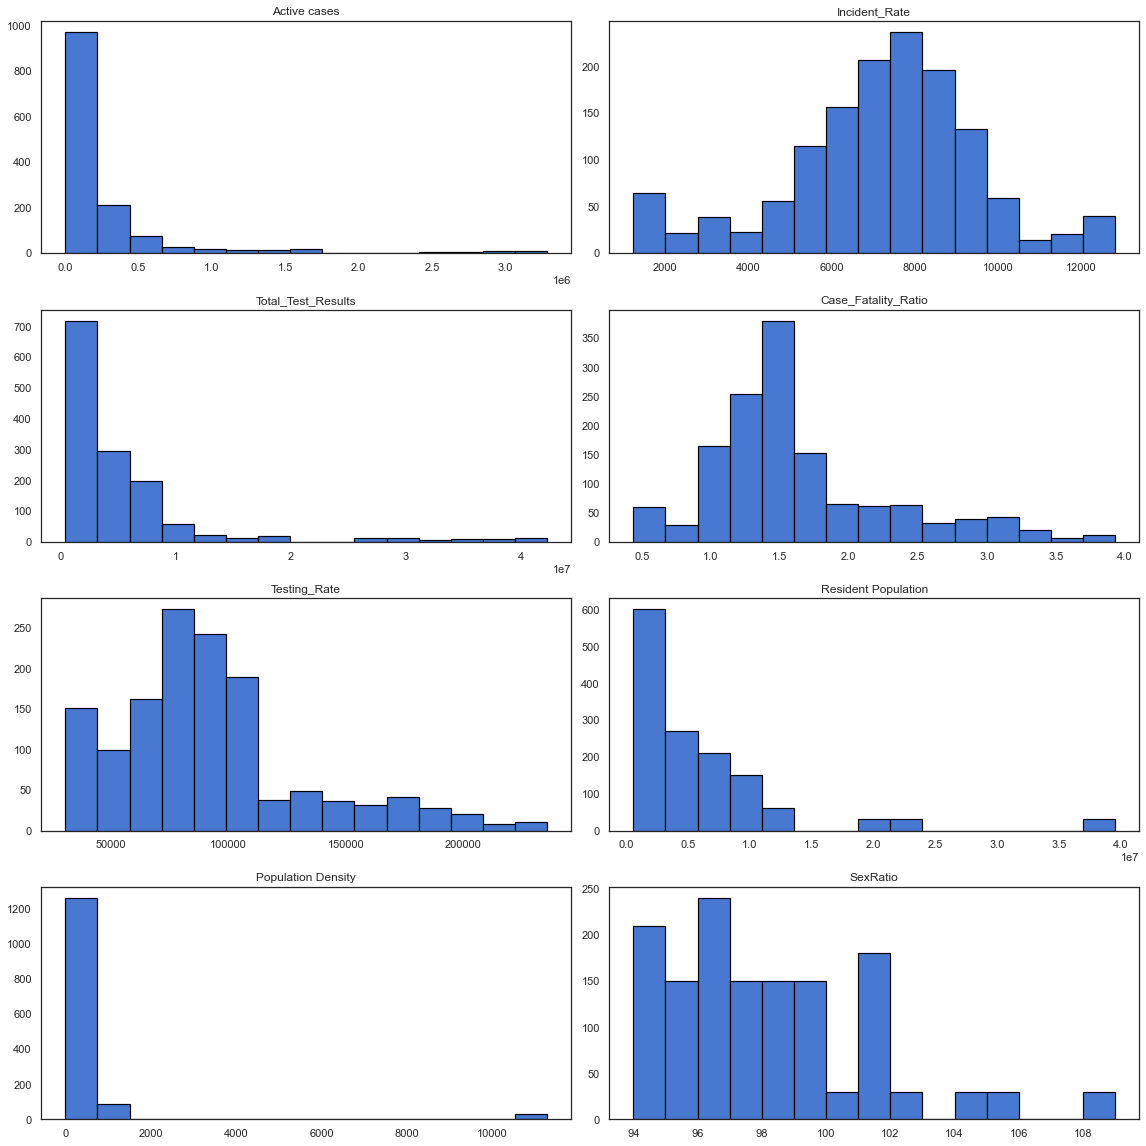

In [176]:
#histograms
n_bins = 15
fig, axes = plt.subplots(4, 2 , figsize=(16,16))
axes[0,0].hist(covid_features['Active'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,0].set_title('Active cases')
axes[0,1].hist(covid_features['Incident_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,1].set_title('Incident_Rate')
axes[1,0].hist(covid_features['Total_Test_Results'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,0].set_title('Total_Test_Results')
axes[1,1].hist(covid_features['Case_Fatality_Ratio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,1].set_title('Case_Fatality_Ratio')
axes[2,0].hist(covid_features['Testing_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,0].set_title('Testing_Rate')
axes[2,1].hist(covid_features['Resident Population 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,1].set_title('Resident Population')
axes[3,0].hist(covid_features['Population Density 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,0].set_title('Population Density')
axes[3,1].hist(covid_features['SexRatio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,1].set_title('SexRatio')
# adding some padding / spacing between subplots
fig.tight_layout(pad=1.0)

# Z-score Regularization of the dataset

In [177]:
scaler = preprocessing.StandardScaler()
scaled_covid=covid_features.copy()
scaled_covid=pd.DataFrame(scaler.fit_transform(scaled_covid), columns=scaled_covid.columns)
scaled_covid.head()

Active  Case_Fatality_Ratio       Day  Density Rank 2020 Census  \
0 -0.200701            -0.476902 -1.675247                  0.118788   
1 -0.449116            -1.800519 -1.675247                  1.614954   
2  0.389194             0.074416 -1.675247                  0.509092   
3 -0.482520            -0.031311 -1.675247                  0.574143   
4  4.276989            -0.792949 -1.675247                 -0.922023   

   Incident_Rate  Population Density 2020 Census  Relative_Active  \
0       0.144028                       -0.217091         -0.29472   
1      -0.290315                       -0.276853         -0.29472   
2       0.088543                       -0.239250         -0.29472   
3       0.202252                       -0.242302         -0.29472   
4      -0.502599                       -0.122779         -0.29472   

   Relative_Case_Fatality_Ratio  Relative_Incident_Rate  \
0                      5.359204               -1.271685   
1                      5.359204               -1.271685   
2                      5.359204               -1.271685   
3                      5.359204               -1.271685   
4                      5.359204               -1.271685   

   Relative_Testing_Rate  Relative_Total_Test_Results  \
0              -0.815332                    -0.577121   
1              -0.815332                    -0.577121   
2              -0.815332                    -0.577121   
3              -0.815332                    -0.577121   
4              -0.815332                    -0.577121   

   Resident Population 2020 Census  SexRatio  State ID  Testing_Rate  \
0                        -0.128626 -1.168679 -1.670726     -1.302217   
1                        -0.754447  3.492526 -1.601799      2.071905   
2                         0.181627  0.385056 -1.532872     -1.269412   
3                        -0.422184 -0.547185 -1.463945     -0.559356   
4                         4.905194  0.385056 -1.395018     -0.177608   

   Total_Test_Results  
0           -0.483568  
1           -0.569578  
2           -0.007494  
3           -0.456622  
4            4.023547

In [178]:
scaled_covid.dtypes

Active                             float64
Case_Fatality_Ratio                float64
Day                                float64
Density Rank 2020 Census           float64
Incident_Rate                      float64
Population Density 2020 Census     float64
Relative_Active                    float64
Relative_Case_Fatality_Ratio       float64
Relative_Incident_Rate             float64
Relative_Testing_Rate              float64
Relative_Total_Test_Results        float64
Resident Population 2020 Census    float64
SexRatio                           float64
State ID                           float64
Testing_Rate                       float64
Total_Test_Results                 float64
dtype: object

# Dealing with outliers

In [179]:
#Removing those rows that have incident_rate greater than 2.5 Z-Score value or lesser than -2.5 Z-Score value
scaled_covid_clean = scaled_covid[scaled_covid['Incident_Rate'].between (-2.5,2.5)]


In [180]:
#Removing those rows that have Case_Fatality_Ratio greater than 3 Z-Score value or lesser than -3 Z-Score value
scaled_covid_clean = scaled_covid_clean[scaled_covid_clean['Case_Fatality_Ratio'].between (-3,3)]

In [181]:
scaled_covid_clean

Active  Case_Fatality_Ratio       Day  Density Rank 2020 Census  \
0    -0.200701            -0.476902 -1.675247                  0.118788   
1    -0.449116            -1.800519 -1.675247                  1.614954   
2     0.389194             0.074416 -1.675247                  0.509092   
3    -0.482520            -0.031311 -1.675247                  0.574143   
4     4.276989            -0.792949 -1.675247                 -0.922023   
...        ...                  ...       ...                       ...   
1375 -0.524201            -0.270412  1.675247                  0.378991   
1376  0.400942            -0.534982  1.675247                 -0.726871   
1377 -0.488254             0.062389  1.675247                  0.248890   
1378 -0.391879            -0.830494  1.675247                 -0.011313   
1379 -0.528728            -0.736766  1.675247                  1.549904   

      Incident_Rate  Population Density 2020 Census  Relative_Active  \
0          0.144028                       -0.217091        -0.294720   
1         -0.290315                       -0.276853        -0.294720   
2          0.088543                       -0.239250        -0.294720   
3          0.202252                       -0.242302        -0.294720   
4         -0.502599                       -0.122779        -0.294720   
...             ...                             ...              ...   
1375      -2.293948                       -0.235038        -0.298467   
1376      -0.559558                       -0.144206        -0.098801   
1377      -0.195930                       -0.232108        -0.379776   
1378       1.287559                       -0.211231        -0.334404   
1379       0.766579                       -0.274045        -0.269051   

      Relative_Case_Fatality_Ratio  Relative_Incident_Rate  \
0                         5.359204               -1.271685   
1                         5.359204               -1.271685   
2                         5.359204               -1.271685   
3                         5.359204               -1.271685   
4                         5.359204               -1.271685   
...                            ...                     ...   
1375                     -0.223324               -0.756160   
1376                     -0.198497               -0.542288   
1377                     -0.188381               -0.368197   
1378                     -0.186806               -0.802583   
1379                     -0.204495               -0.391970   

      Relative_Testing_Rate  Relative_Total_Test_Results  \
0                 -0.815332                    -0.577121   
1                 -0.815332                    -0.577121   
2                 -0.815332                    -0.577121   
3                 -0.815332                    -0.577121   
4                 -0.815332                    -0.577121   
...                     ...                          ...   
1375               0.992907                    -0.447993   
1376              -0.404425                    -0.174592   
1377              -0.100895                    -0.430407   
1378              -0.242167                    -0.194501   
1379              -0.816803                    -0.577137   

      Resident Population 2020 Census  SexRatio  State ID  Testing_Rate  \
0                           -0.128626 -1.168679 -1.670726     -1.302217   
1                           -0.754447  3.492526 -1.601799      2.071905   
2                            0.181627  0.385056 -1.532872     -1.269412   
3                           -0.422184 -0.547185 -1.463945     -0.559356   
4                            4.905194  0.385056 -1.395018     -0.177608   
...                               ...       ...       ...           ...   
1375                        -0.767619 -0.236438  1.430980      1.274271   
1376                         0.397468 -0.236438  1.499907     -0.745315   
1377                        -0.599800  0.074309  1.637761      0.411281   
1378                      

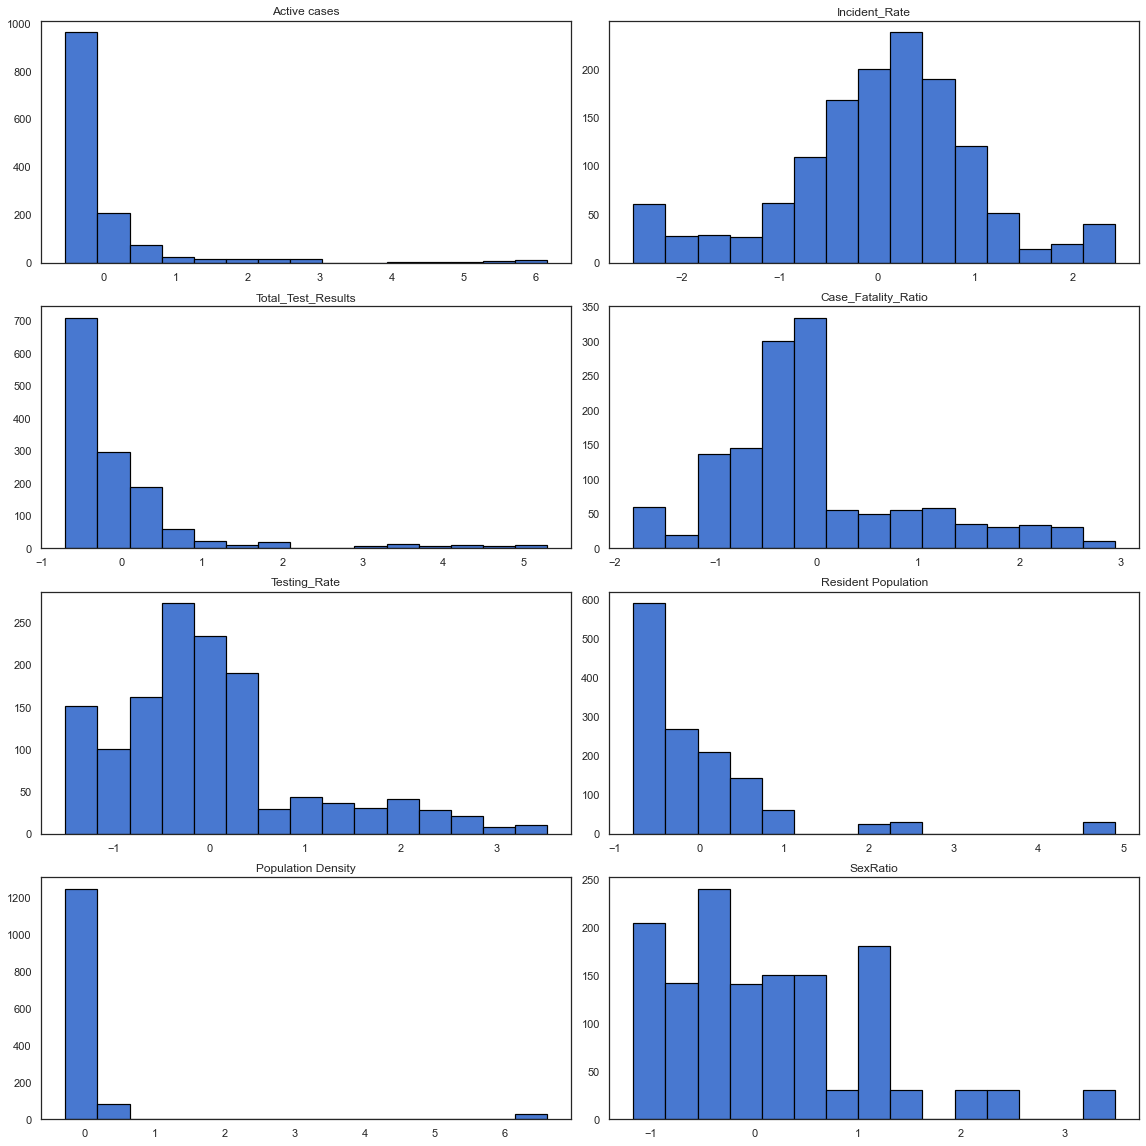

In [182]:
#histograms
n_bins = 15
fig, axes = plt.subplots(4, 2 , figsize=(16,16))
axes[0,0].hist(scaled_covid_clean['Active'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,0].set_title('Active cases')
axes[0,1].hist(scaled_covid_clean['Incident_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[0,1].set_title('Incident_Rate')
axes[1,0].hist(scaled_covid_clean['Total_Test_Results'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,0].set_title('Total_Test_Results')
axes[1,1].hist(scaled_covid_clean['Case_Fatality_Ratio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[1,1].set_title('Case_Fatality_Ratio')
axes[2,0].hist(scaled_covid_clean['Testing_Rate'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,0].set_title('Testing_Rate')
axes[2,1].hist(scaled_covid_clean['Resident Population 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[2,1].set_title('Resident Population')
axes[3,0].hist(scaled_covid_clean['Population Density 2020 Census'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,0].set_title('Population Density')
axes[3,1].hist(scaled_covid_clean['SexRatio'], bins = n_bins, edgecolor='black', linewidth=1.2)
axes[3,1].set_title('SexRatio')
# adding some padding / spacing between subplots
fig.tight_layout(pad=1.0)

### Pairplot of all the attributes against Recovered Label

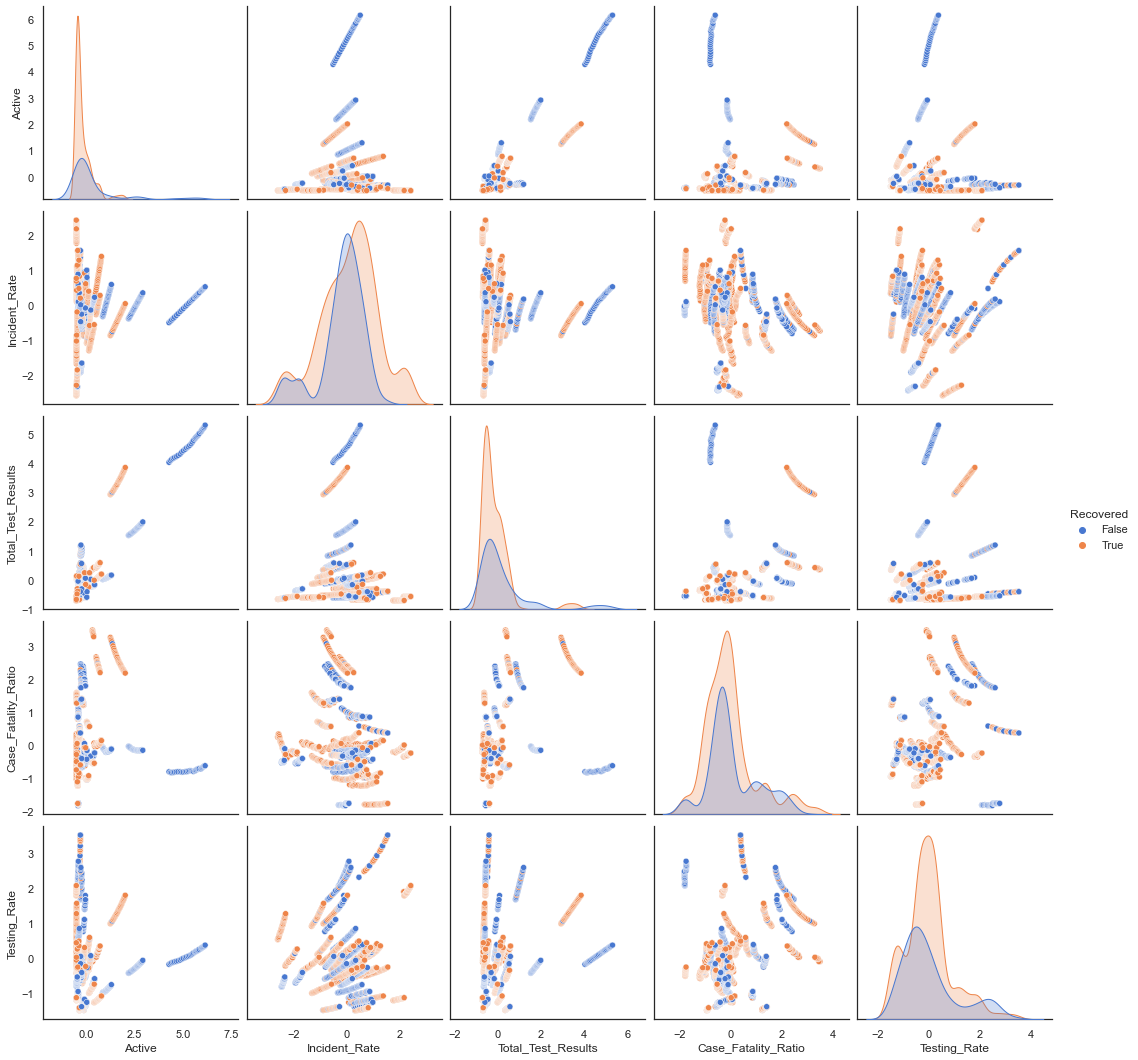

In [183]:
#Making scatter plots of selected paired features by using seaborn's pairplot function:
sns.set(style = 'white', palette="muted")
sns.pairplot(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate']].join(covid[['Recovered']]),
            hue = 'Recovered', height=3, aspect=1)

### Pairplot of all the attributes against Confirmed Label

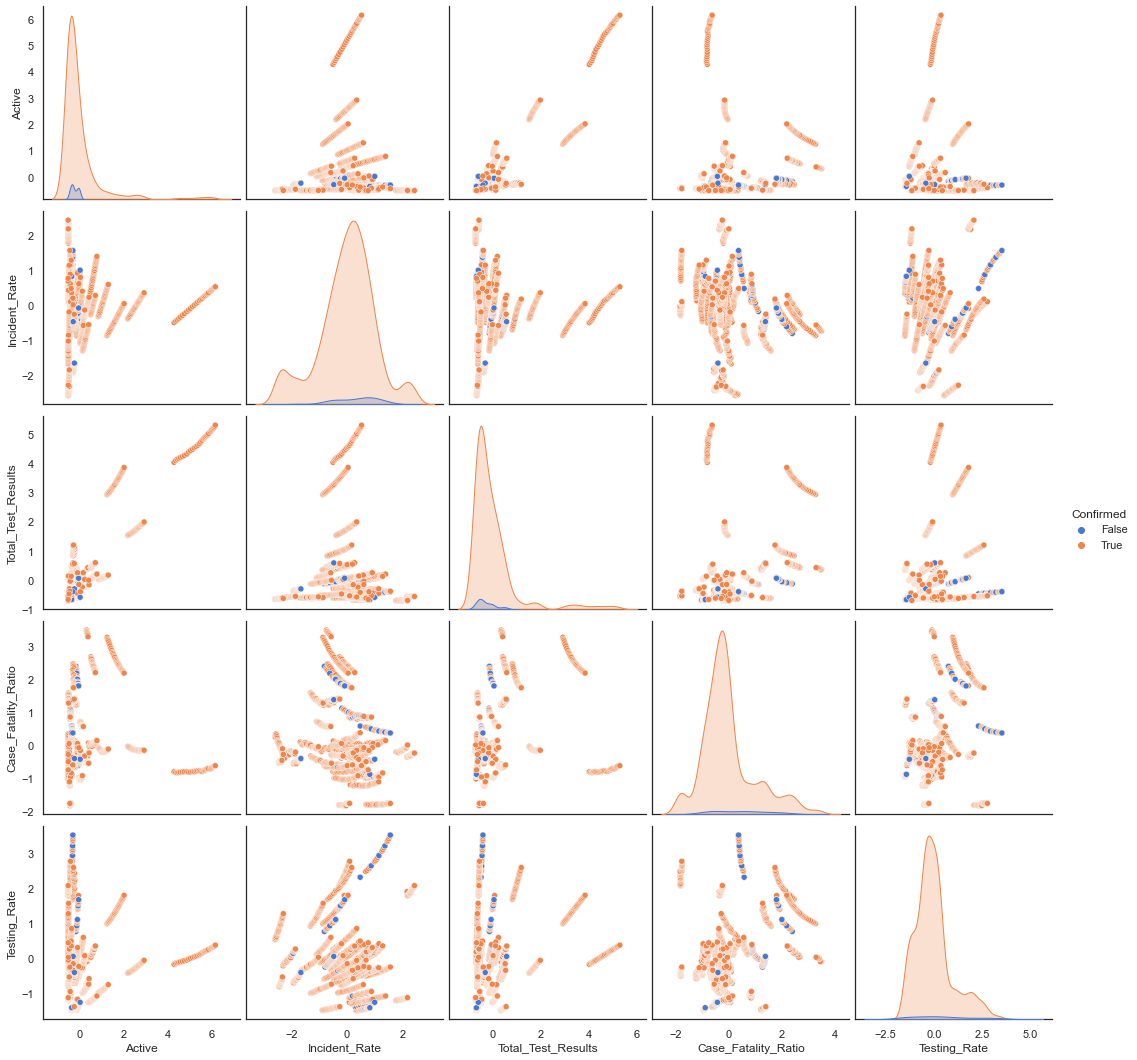

In [184]:
#Making scatter plots of selected paired features by using seaborn's pairplot function:
sns.set(style = 'white', palette="muted", color_codes=True)
sns.pairplot(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate']].join(covid[['Confirmed']]),
            hue = 'Confirmed', height=3, aspect=1)

### Pairplot of all the attributes against Deaths Label

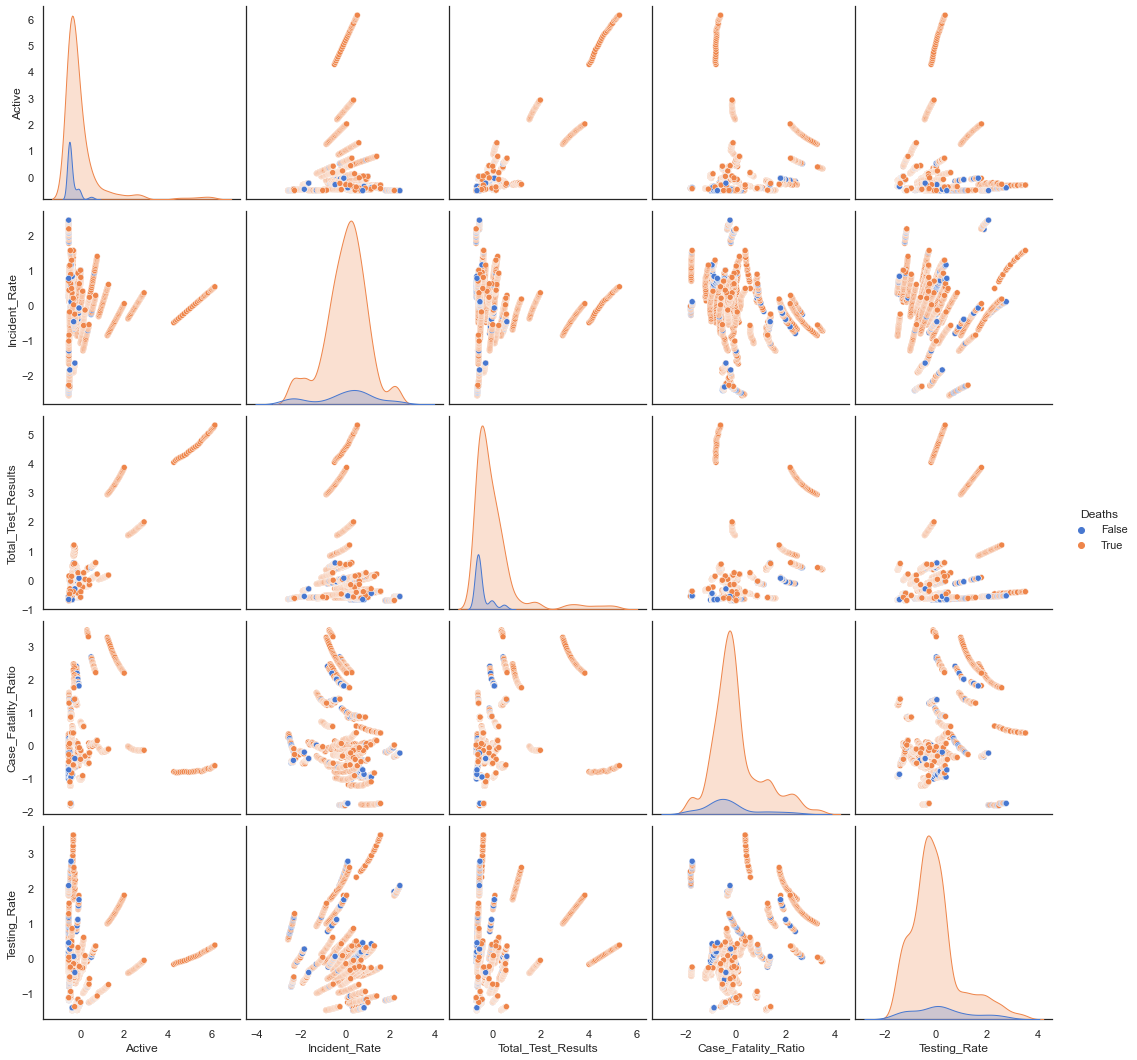

In [185]:
#Making scatter plots of selected paired features by using seaborn's pairplot function:
sns.set(style = 'white', palette="muted")
sns.pairplot(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate']].join(covid[['Deaths']]),
            hue = 'Deaths', height=3, aspect=1)
plt.show()

## [CM2] PCA and LDA Implementation

### PCA Implementation

Principal Component Analysis (PCA) is an unsupervised linear transformation technique that is widely used across different fields, most prominently for feature extraction and dimensionality reduction. It helps us to identify patterns in data based on the correlation between features. As a result of transforming the original d-dimensional data onto this new k-dimensional subspace (typically k ≪ d), the first principal component will have the largest possible variance.

In [186]:
from sklearn.decomposition import PCA
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

def implement_PCA(components, data, svd_solver='auto'):
    pca = PCA(n_components = components, svd_solver=svd_solver)
    Principal_Components = pca.fit_transform(data)
    df_pca = pd.DataFrame(data = Principal_Components)
    return(df_pca, pca)

def PCA_ScreePlot(pca):
    pc_value = np.arange(pca.n_components_) + 1
    plt.figure(figsize=(15,8)) 
    plt.plot(pc_value, pca.explained_variance_ratio_, 'ro-', linewidth=2)
    plt.grid()
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Proportion of variance explained')
    plt.locator_params(axis="y", nbins=25)
    plt.show()
    

## Applying PCA with n_components = 10

In [187]:
pca_implement = implement_PCA(components = 10, data=scaled_covid)
pca_features_covid = pca_implement[0]
pca_covid_data = pca_implement[1]

## Scree Plot depicting the cumulative variance represented by the eigen vectors

Using Scree Plot which depicts the cumulative variance represented by the eigen vectors. (Plotting n_components vs Variance). The best values of n_components is when slope starts leveling off.

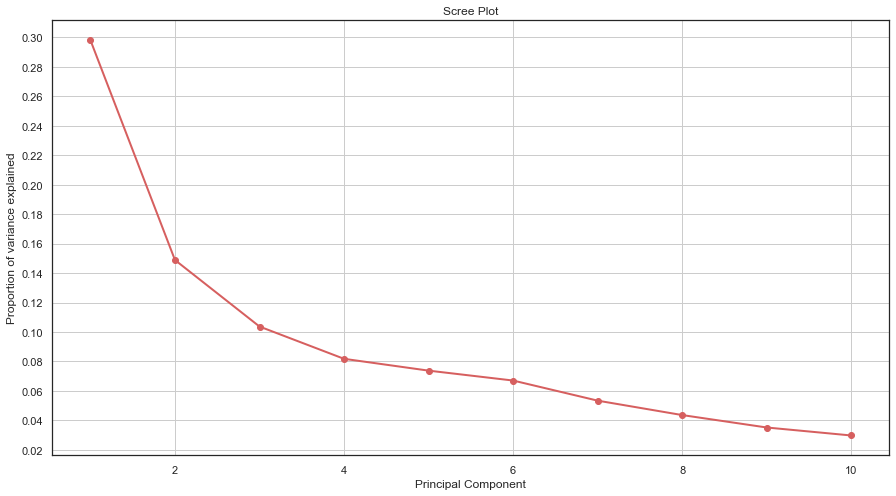

In [188]:
PCA_ScreePlot(pca_covid_data)

### From the above graph, we can note that at the 5th principal component, the cumulative variance is around 0.07, thus even at the 5th component we do not lose much information and we have retained over 99.3% of the characteristics. So, we can select the first 5 PCA components. If we need to save more information, we can consider more components. 

## Plotting the first 2 PCA components on Day 3 data for all the states

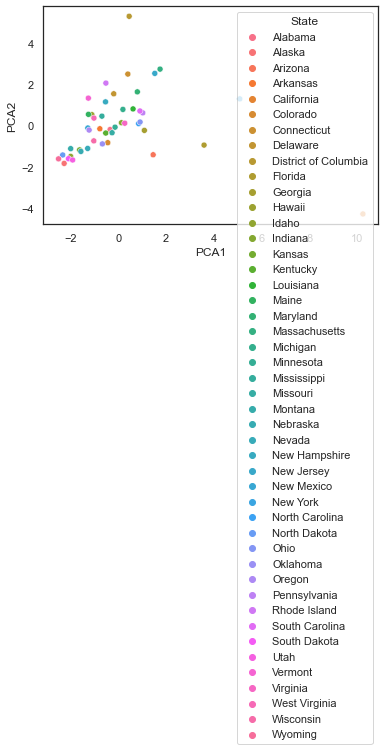

In [189]:
day_3_covid_data_indices = df.index[df['Day'] == 3]
day_3_covid_data = pca_features_covid.iloc[day_3_covid_data_indices, 0:2]
state_names = df.iloc[day_3_covid_data_indices, 2]
day_3_covid_data = day_3_covid_data.join(state_names)
day_3_covid_data.columns = ['PCA1', 'PCA2', 'State']
p = sns.scatterplot(x='PCA1', y='PCA2', hue='State', data=day_3_covid_data)


### Making the hybrid dataset after incorporating PCA components

In [190]:
#Making the hybrid test dataset by using covid_test_update along with first 5 PCA components.
features_hybrid = scaled_covid.copy(deep=True)
x = pca_features_covid[0].tolist()
features_hybrid.loc[:, 'PCA1'] = x
x = pca_features_covid[1].tolist()
features_hybrid.loc[:, 'PCA2'] = x
x = pca_features_covid[2].tolist()
features_hybrid.loc[:, 'PCA3'] = x
x = pca_features_covid[3].tolist()
features_hybrid.loc[:, 'PCA4'] = x
x = pca_features_covid[4].tolist()
features_hybrid.loc[:, 'PCA5'] = x

features_hybrid.head()

Active  Case_Fatality_Ratio       Day  Density Rank 2020 Census  \
0 -0.200701            -0.476902 -1.675247                  0.118788   
1 -0.449116            -1.800519 -1.675247                  1.614954   
2  0.389194             0.074416 -1.675247                  0.509092   
3 -0.482520            -0.031311 -1.675247                  0.574143   
4  4.276989            -0.792949 -1.675247                 -0.922023   

   Incident_Rate  Population Density 2020 Census  Relative_Active  \
0       0.144028                       -0.217091         -0.29472   
1      -0.290315                       -0.276853         -0.29472   
2       0.088543                       -0.239250         -0.29472   
3       0.202252                       -0.242302         -0.29472   
4      -0.502599                       -0.122779         -0.29472   

   Relative_Case_Fatality_Ratio  Relative_Incident_Rate  \
0                      5.359204               -1.271685   
1                      5.359204               -1.271685   
2                      5.359204               -1.271685   
3                      5.359204               -1.271685   
4                      5.359204               -1.271685   

   Relative_Testing_Rate  ...  Resident Population 2020 Census  SexRatio  \
0              -0.815332  ...                        -0.128626 -1.168679   
1              -0.815332  ...                        -0.754447  3.492526   
2              -0.815332  ...                         0.181627  0.385056   
3              -0.815332  ...                        -0.422184 -0.547185   
4              -0.815332  ...                         4.905194  0.385056   

   State ID  Testing_Rate  Total_Test_Results      PCA1      PCA2      PCA3  \
0 -1.670726     -1.302217           -0.483568 -0.994092 -0.214278 -4.687338   
1 -1.601799      2.071905           -0.569578 -2.797806 -2.027194 -2.119420   
2 -1.532872     -1.269412           -0.007494 -0.765198 -0.974053 -4.430999   
3 -1.463945     -0.559356           -0.456622 -1.376304 -0.153706 -4.133136   
4 -1.395018     -0.177608            4.023547  4.757710 -2.760709 -5.198142   

       PCA4      PCA5  
0 -0.734933  1.998369  
1 -3.031767  5.254820  
2 -1.289956  2.516045  
3 -1.101241  2.479293  
4 -3.074348  2.636342  

[5 rows x 21 columns]

## LDA Implementation

In [191]:
def train_LDA(traindata, trainlabels, components=1):
    lda = LinearDiscriminantAnalysis(n_components = components)
    lda_function = lda.fit(traindata, trainlabels)
    return lda_function

### Applying LDA 

#### Splitting the train and test data

In [192]:
X_train, X_test, y_train, y_test = train_test_split(scaled_covid, covid[['Recovered', 'Deaths', 'Confirmed']],
                                                   test_size=0.04, random_state=98)

### Implementing LDA on Recovered class

In [193]:
lda = train_LDA(traindata = X_train, trainlabels = y_train['Recovered'])
print("............Performance Report of LDA for Recovered Class.......\n")
print(classification_report(y_test['Recovered'], lda.predict(X_test)))
print('AUC Score: {0:.4f}\n'.format(roc_auc_score(y_test['Recovered'], lda.predict(X_test))))
print(lda.coef_)

............Performance Report of LDA for Recovered Class.......

              precision    recall  f1-score   support

       False       0.65      0.58      0.61        19
        True       0.79      0.84      0.82        37

    accuracy                           0.75        56
   macro avg       0.72      0.71      0.71        56
weighted avg       0.74      0.75      0.75        56

AUC Score: 0.7084

[[-0.23103084 -0.28778153  0.05895751  0.09494017  0.2318042   0.76361176
  -0.85037474  0.15972257  0.68881192 -0.02494389  0.2346523  -2.28578608
   0.34571352  1.15432891 -0.7580231   2.56051312]]


In [194]:
lda.explained_variance_ratio_

array([1.])

### Implementing LDA on Confirmed class

In [195]:
lda = train_LDA(traindata = X_train, trainlabels = y_train['Confirmed'])
print("............Performance Report of LDA for Confirmed Class.......\n")
print(classification_report(y_test['Confirmed'], lda.predict(X_test)))
print('AUC Score: {0:.4f}\n'.format(roc_auc_score(y_test['Confirmed'], lda.predict(X_test))))
print(lda.coef_)

............Performance Report of LDA for Confirmed Class.......

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         3
        True       0.95      0.98      0.96        53

    accuracy                           0.93        56
   macro avg       0.47      0.49      0.48        56
weighted avg       0.89      0.93      0.91        56

AUC Score: 0.4906

[[-1.38400551 -0.70612663  0.5886971   0.69247756 -1.10815351  0.79261072
  -0.54174482  0.67901955  2.18244494  0.80541236 -0.03172222  0.18372856
   0.94279191  0.12889328 -1.21628112  2.2197213 ]]


### Implementing LDA on Deaths class

In [196]:
lda = train_LDA(traindata = X_train, trainlabels = y_train['Deaths'])
print("............Performance Report of LDA for Deaths Class.......\n")
print(classification_report(y_test['Deaths'], lda.predict(X_test)))
print('AUC Score: {0:.4f}\n'.format(roc_auc_score(y_test['Deaths'], lda.predict(X_test))))
print(lda.coef_)

............Performance Report of LDA for Deaths Class.......

              precision    recall  f1-score   support

       False       1.00      0.12      0.22         8
        True       0.87      1.00      0.93        48

    accuracy                           0.88        56
   macro avg       0.94      0.56      0.58        56
weighted avg       0.89      0.88      0.83        56

AUC Score: 0.5625

[[-0.60136315 -0.68704633 -0.01103776  0.35391502  0.26537709  0.3479644
  -0.3492118   0.27292229  0.48447807  0.04034346  0.50210309  0.90080851
  -1.56876002 -0.14744204  0.00270262 -0.03999497]]


### Observations: 
It is evident that LDA provides better and improved classification for the Deaths and Confirmed class than that of Recovered class. Accuracy of classification for label “Recovered” is 75% when compared to 88% and 93% for label “Deaths” and “Confirmed” respectively.

## [CM3] Decision Tree Classifier

#### Utilities:

In [197]:
def TrainedGridOutcome(grid):
    optimum_param = grid.best_estimator_.get_params()
    print("Best Accuracy: \n", grid.best_score_)
    print("\n.........................\n")
    print("Optimum parameters \n", grid.best_params_)
    print("\n.........................\n")
    print("Optimum value of Max_depth \n", grid.best_params_['max_depth'])
    if 'n_estimators' in grid.best_params_:
        print('Best No. of Trees \n', grid.best_params_['n_estimators'])
    

## Case Study 1: Decision Tree Classifier Using Original Preprocessed Dataset

### Case study 1A: Assuming k= 5 for k-fold cross validation; and taking target label as 'Recovered'

max_depth: 3 	Accuracy: 70.29%
max_depth: 5 	Accuracy: 81.74%
max_depth: 10 	Accuracy: 93.84%
max_depth: None 	Accuracy: 94.42%


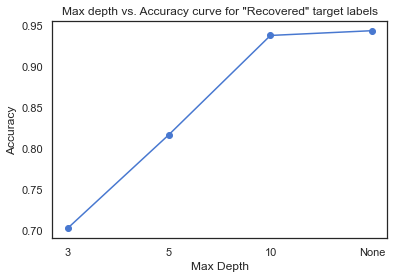

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x1 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate' ]].values
y1 = covid['Recovered'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(decision_tree, x1, y1, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Recovered" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the preprocessed covid data, we can observe that the highest accuracy of 94.42% is obtained at max_depth = None. A relatively matching accuracy is obtained at max_depth = 10.

### Analysing the Decision Tree for "Recovered" target labels for Covid Dataset and Max depth = 3

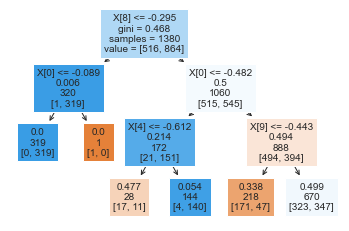

<Figure size 2880x2880 with 0 Axes>

|--- Relative_Active <= -0.30
|   |--- Active <= -0.09
|   |   |--- class: True
|   |--- Active >  -0.09
|   |   |--- class: False
|--- Relative_Active >  -0.30
|   |--- Active <= -0.48
|   |   |--- Testing_Rate <= -0.61
|   |   |   |--- class: False
|   |   |--- Testing_Rate >  -0.61
|   |   |   |--- class: True
|   |--- Active >  -0.48
|   |   |--- Relative_Incident_Rate <= -0.44
|   |   |   |--- class: False
|   |   |--- Relative_Incident_Rate >  -0.44
|   |   |   |--- class: True



In [199]:
max_depths = [3]
covid_col = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].columns
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec1_tree = dec_tree.fit(x1,y1)
    tree.plot_tree(dec1_tree, fontsize=10, label = 'root', filled = True)
    plt.figure(figsize=(40,40))
    plt.show()
    text_representation = tree.export_text(dec1_tree, feature_names = covid_col.tolist())
    print(text_representation)

## Observations:

#### 1. From the above figure, we can deduce that the root node splits on the Active case feature. The split was on the rule "Active <= -0.09" and it was further divided on the basis of Testing_Rate (Testing_Rate <= -0.61) on left side and Relative_Incident_Rate (Relative_Incident_Rate<= -0.44) on the right side. This depicts that there is a direct correlation between the Active cases and Testing Rate as well as between Active cases and Incident Rate statewise.

### Searching for best paramter for Decision Tree for "Recovered" Label:

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x1 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].values
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x1, covid['Recovered'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [201]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9405797101449276

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': None}

.........................

Optimum value of Max_depth 
 None


### Case Study 1B: Assuming k= 5 for k-fold cross validation; and taking target label as 'Deaths'

max_depth: 3 	Accuracy: 93.99%
max_depth: 5 	Accuracy: 94.28%
max_depth: 10 	Accuracy: 94.20%
max_depth: None 	Accuracy: 93.99%


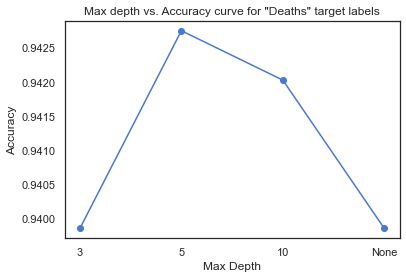

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x2 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].values
y2 = covid['Deaths'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(decision_tree, x2, y2, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Deaths" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the preprocessed covid data, we can observe that the highest accuracy of 94.28% is obtained at max_depth = 5. We also observe that a relatively matching accuracy is obtained at max_depth = 10.

### Analysing the Decision Tree for "Deaths" target labels for Covid Dataset and Max depth = 3

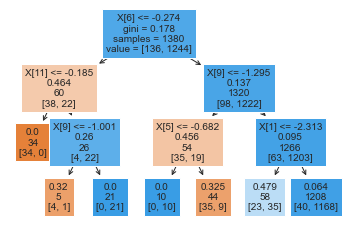

<Figure size 2880x2880 with 0 Axes>

|--- Population Density 2020 Census <= -0.27
|   |--- Relative_Case_Fatality_Ratio <= -0.18
|   |   |--- class: False
|   |--- Relative_Case_Fatality_Ratio >  -0.18
|   |   |--- Relative_Incident_Rate <= -1.00
|   |   |   |--- class: False
|   |   |--- Relative_Incident_Rate >  -1.00
|   |   |   |--- class: True
|--- Population Density 2020 Census >  -0.27
|   |--- Relative_Incident_Rate <= -1.29
|   |   |--- Resident Population 2020 Census <= -0.68
|   |   |   |--- class: True
|   |   |--- Resident Population 2020 Census >  -0.68
|   |   |   |--- class: False
|   |--- Relative_Incident_Rate >  -1.29
|   |   |--- Incident_Rate <= -2.31
|   |   |   |--- class: True
|   |   |--- Incident_Rate >  -2.31
|   |   |   |--- class: True



In [203]:
max_depths = [3]
covid_col = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].columns
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec2_tree = dec_tree.fit(x2,y2)
    tree.plot_tree(dec2_tree, fontsize=10, label = 'root', filled = True)
    plt.figure(figsize=(40,40))
    plt.show()
    text_representation = tree.export_text(dec2_tree, feature_names = covid_col.tolist())
    print(text_representation)

## Observations: 

#### 1. From the above figure, we can deduce that the root node splits on the Population density feature. The left side of the root node further divides on the basis of  Relative_Case_Fatality_Ratio (Relative_Case_Fatality_Ratio <= -0.18) followed by Relative_Incident_Rate (Relative_Incident_Rate <= -1.00). This depicts that there is a direct correlation between Population density of a state and Relative_Case_Fatality_Ratio for that state.

#### 2. It is also evident that there is a direct correlation between Relative_Incident_Rate and Relative_Case_Fatality_Ratio for each state.

#### 3. Similarly, there is a correlation between Resident population and the Incident Rate.

### Searching for best paramter for Decision Tree for "Deaths" Label:

In [204]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x2 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].values
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x2, covid['Deaths'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [205]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9485507246376811

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 10}

.........................

Optimum value of Max_depth 
 10


### Case Study 1C: Assuming k= 5 for k-fold cross validation; and taking target label as 'Confirmed'

max_depth: 3 	Accuracy: 99.20%
max_depth: 5 	Accuracy: 99.20%
max_depth: 10 	Accuracy: 99.28%
max_depth: None 	Accuracy: 99.28%


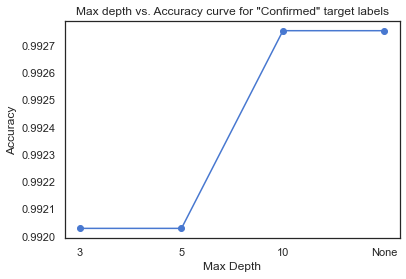

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x3 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].values
y3 = covid['Confirmed'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(decision_tree, x3, y3, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Confirmed" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the preprocessed covid data, we can observe that the highest accuracy of 99.28% is obtained at max_depth = 10 and None.

### Analysing the Decision Tree for all the target label [ 'Confirmed'] for Covid Dataset and Max depth = 3

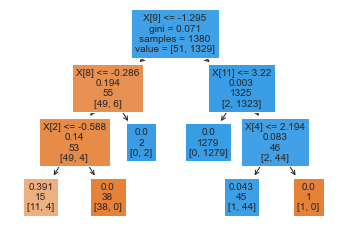

<Figure size 2880x2880 with 0 Axes>

|--- Relative_Incident_Rate <= -1.29
|   |--- Relative_Active <= -0.29
|   |   |--- Total_Test_Results <= -0.59
|   |   |   |--- class: False
|   |   |--- Total_Test_Results >  -0.59
|   |   |   |--- class: False
|   |--- Relative_Active >  -0.29
|   |   |--- class: True
|--- Relative_Incident_Rate >  -1.29
|   |--- Relative_Case_Fatality_Ratio <= 3.22
|   |   |--- class: True
|   |--- Relative_Case_Fatality_Ratio >  3.22
|   |   |--- Testing_Rate <= 2.19
|   |   |   |--- class: True
|   |   |--- Testing_Rate >  2.19
|   |   |   |--- class: False



In [207]:
max_depths = [3]
covid_col = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].columns
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec3_tree = dec_tree.fit(x3,y3)
    tree.plot_tree(dec3_tree, fontsize=10, label = 'root', filled = True)
    plt.figure(figsize=(40,40))
    plt.show()
    text_representation = tree.export_text(dec3_tree, feature_names = covid_col.tolist())
    print(text_representation)

### Observations:
#### 1. From the above figure, we can deduce that the root node splits on the Relative_Incident_Rate (Relative_Incident_Rate <= -1.29) which gets further divided on the basis of Relative_Active cases followed by the Total_Test_Results on the left side of the node. This shows that there is a correlation between Relative_Incident_Rate and Relative_Active cases per state. It also depicts a correlation between Relative_Active cases per state and Total_Test_Results for that state.

#### 2. It is also observed that there is a correlation between Relative_Incident_Rate and Relative_Case_Fatality_Ratio from the right side of the root node. Likewise, a correlation is observed between Relative_Case_Fatality_Ratio and Testing_Rate.

### Searching for best paramter for Decision Tree for "Confirmed" Label:

In [208]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x3 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].values
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x3, covid['Confirmed'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [209]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9934782608695653

.........................

Optimum parameters 
 {'criterion': 'gini', 'max_depth': 5}

.........................

Optimum value of Max_depth 
 5


### Case Study 1D: Assuming k= 5 for k-fold cross validation; and taking all the three target labels: 'Recovered', 'Confirmed' and 'Deaths' for hybrid dataset

max_depth: 3 	Accuracy: 94.78%
max_depth: 5 	Accuracy: 95.00%
max_depth: 10 	Accuracy: 95.00%
max_depth: None 	Accuracy: 94.71%


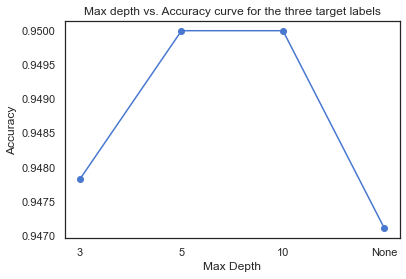

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x4 = (scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].join(covid[['Recovered', 'Confirmed']])).values
y4 = covid[['Deaths']].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(decision_tree, x4, y4, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for the three target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the preprocessed covid data, we can observe that the highest accuracy of 95% is obtained at max_depth = 5 and 10.

### Searching for best paramter for Decision Tree for all the three target labels ['Recovered', 'Deaths', 'Confirmed']

In [211]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x4 = (scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].join(covid[['Recovered', 'Confirmed']])).values
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x4, covid['Deaths'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [212]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9507246376811593

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': None}

.........................

Optimum value of Max_depth 
 None


### Analysing the Decision Tree for all the three target labels ['Recovered', 'Deaths', 'Confirmed'] for Covid Dataset and Max depth = 3

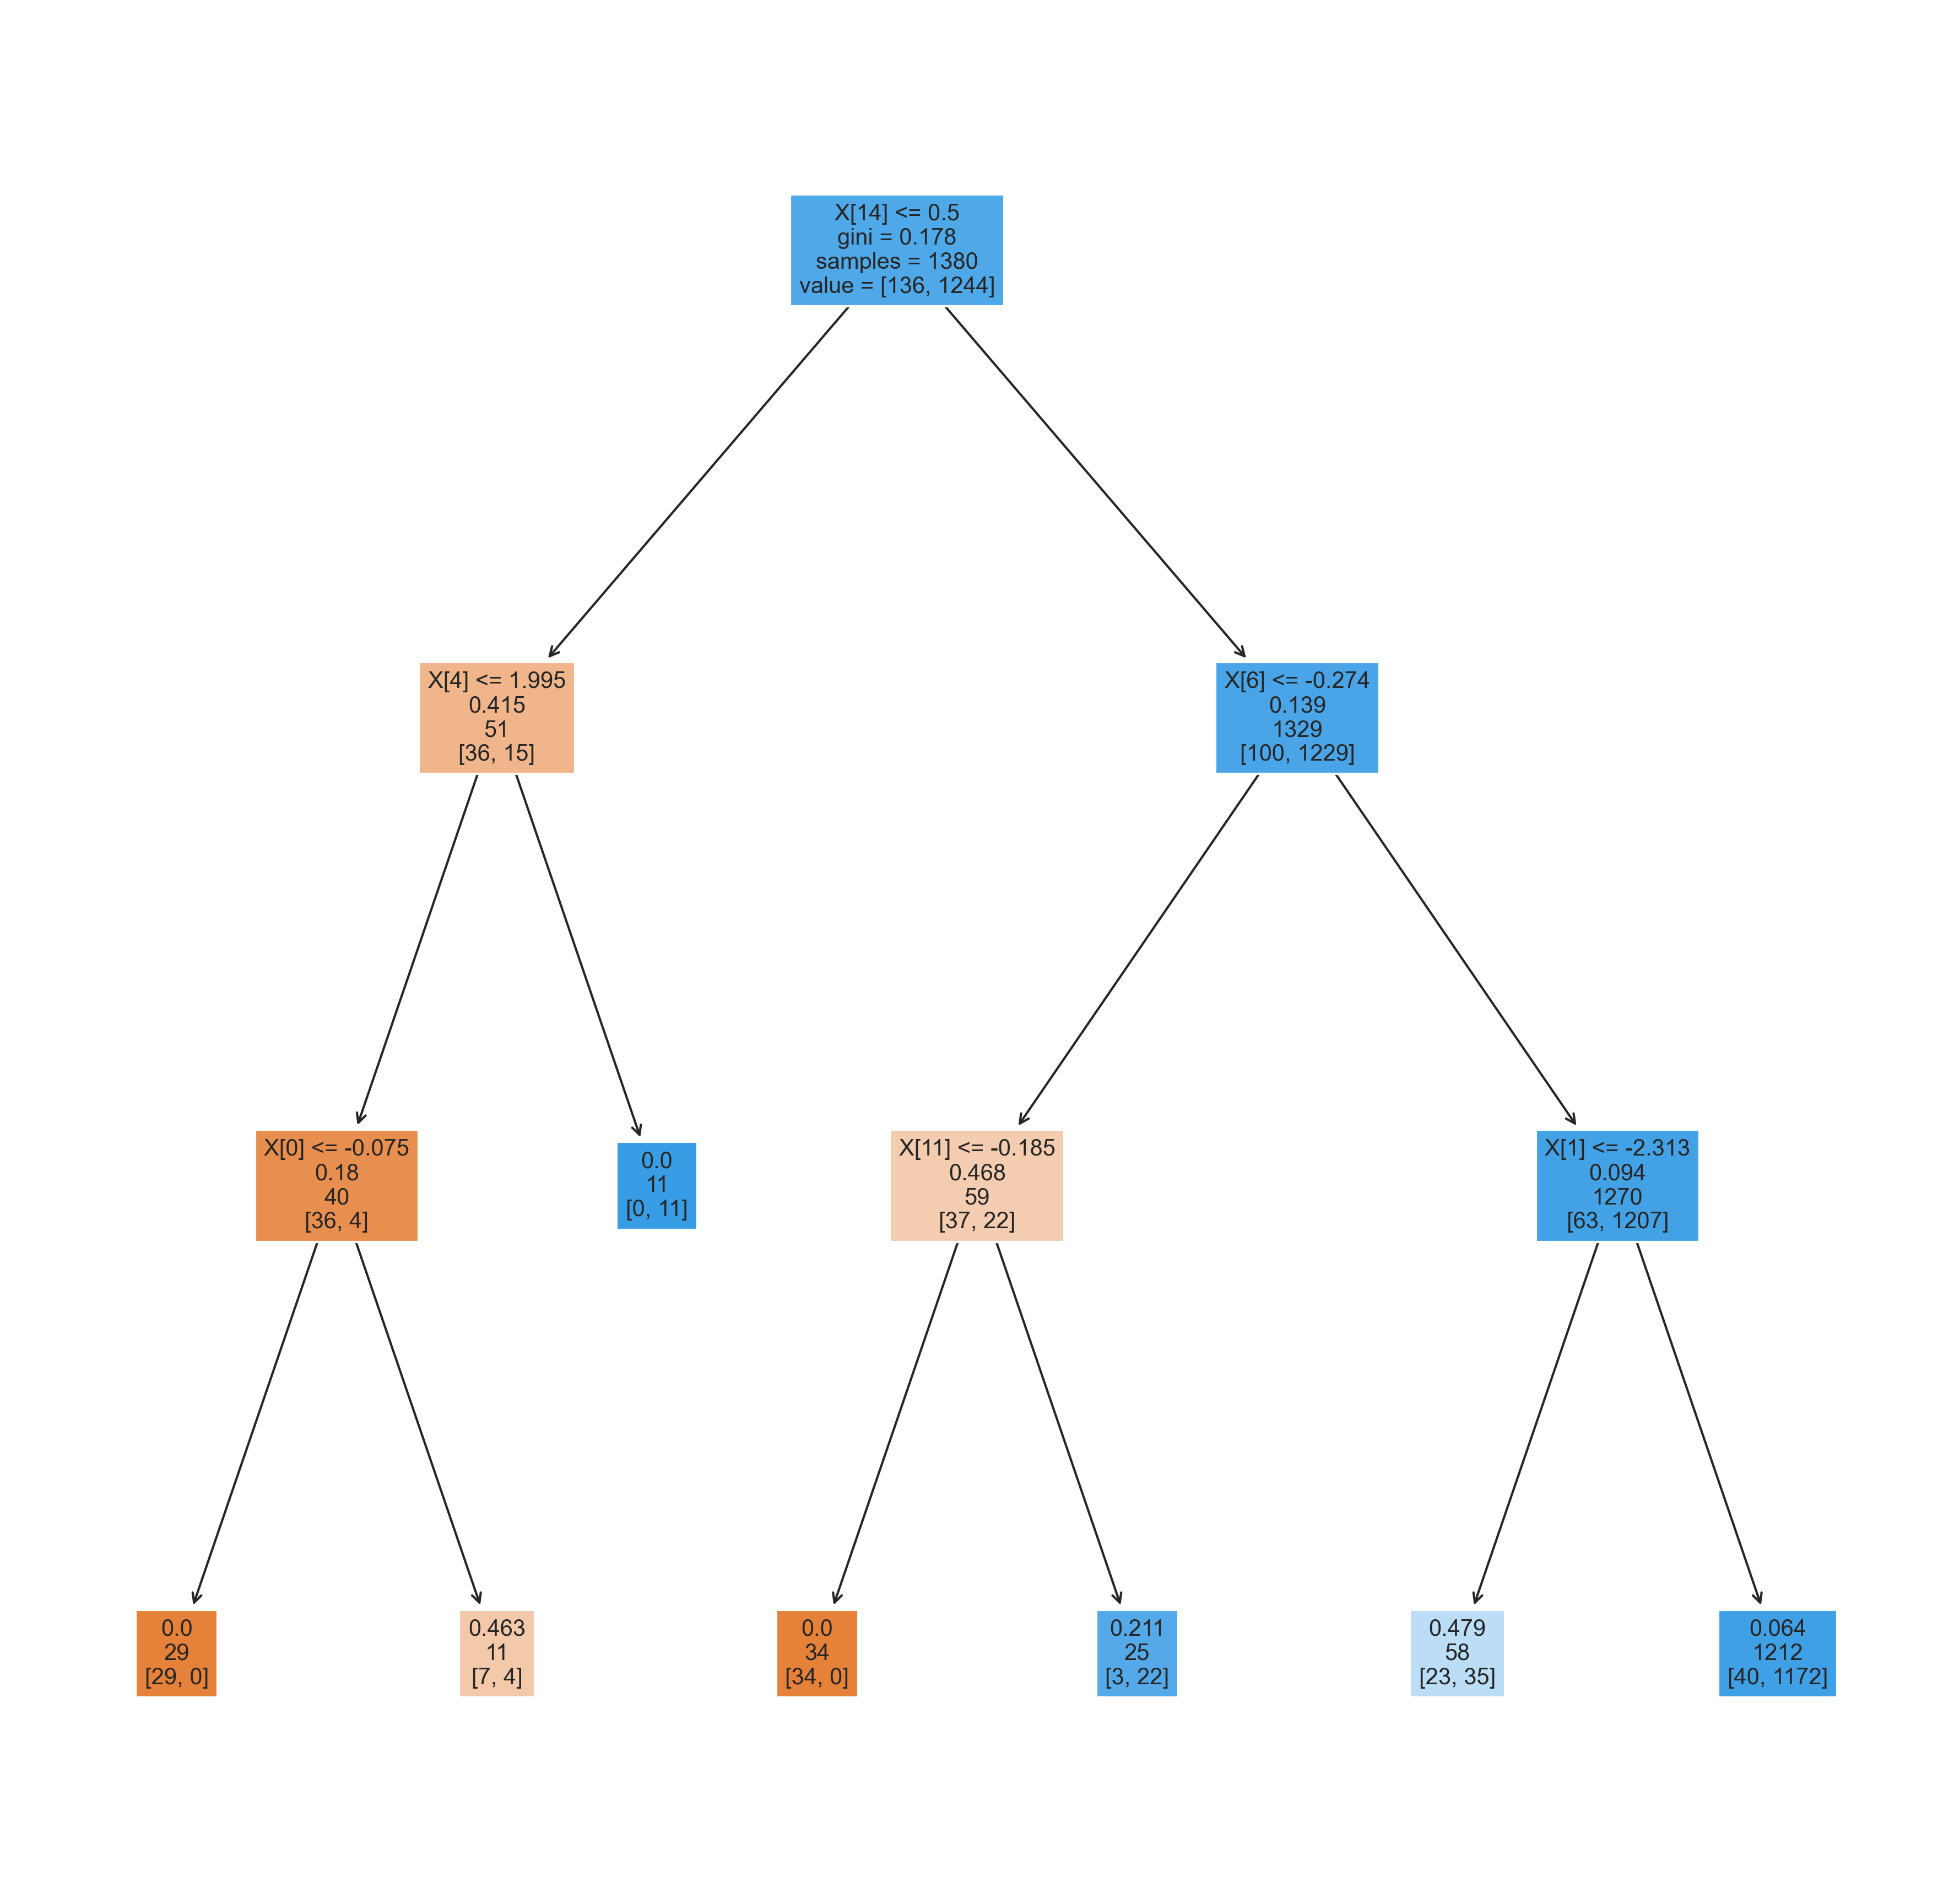

|--- Confirmed <= 0.50
|   |--- Testing_Rate <= 2.00
|   |   |--- Active <= -0.08
|   |   |   |--- class: False
|   |   |--- Active >  -0.08
|   |   |   |--- class: False
|   |--- Testing_Rate >  2.00
|   |   |--- class: True
|--- Confirmed >  0.50
|   |--- Population Density 2020 Census <= -0.27
|   |   |--- Relative_Case_Fatality_Ratio <= -0.18
|   |   |   |--- class: False
|   |   |--- Relative_Case_Fatality_Ratio >  -0.18
|   |   |   |--- class: True
|   |--- Population Density 2020 Census >  -0.27
|   |   |--- Incident_Rate <= -2.31
|   |   |   |--- class: True
|   |   |--- Incident_Rate >  -2.31
|   |   |   |--- class: True



In [213]:
max_depths = [3]
covid_col = (scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].join(covid[['Recovered', 'Confirmed']])).columns
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec4_tree = dec_tree.fit(x4,y4)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
    tree.plot_tree(dec4_tree, fontsize=10, label = 'root', filled = True)
    plt.show()
    
    text_representation = tree.export_text(dec4_tree, feature_names = covid_col.tolist())
    print(text_representation)

### Observations:

#### 1. From the above figure, we note that the root node splits on the number of confirmed cases. The split shows that for the left side of the root node the [confirmed] <= 0.5 whereas the right side of the root node has the confirmed count ratio greater than 0.5. We can also note that further split of the right side of the root node is on the basis of Population density (Population Density 2020 Census <= -0.27). This depicts a correlation between the number of confirmed cases and population density for each state.

#### 2. The node further gets divided on the basis of Testing_Rate and Active cases on the left side. It shows that Testing_Rate and Active case count is correlated. 

#### 3. Similarly, we can note from the right node that Relative_Case_Fatality_Ratio per state and Population Density 2020 Census as well as Incident_Rate and Population density are also directly correlated.

## Case Study 2: Decision Tree Classifier Using Hybrid Dataset (including PCA components)

### Case Study 2A: Assuming k= 5 for k-fold cross validation; and taking target label as 'Recovered'

RangeIndex(start=0, stop=5, step=1)
max_depth: 3 	Accuracy: 70.22%
max_depth: 5 	Accuracy: 80.94%
max_depth: 10 	Accuracy: 94.28%
max_depth: None 	Accuracy: 93.99%


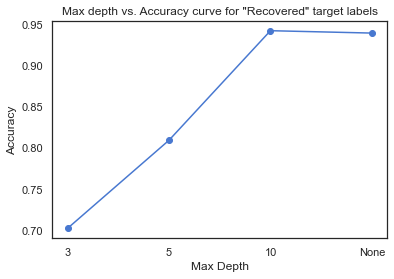

In [214]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
PCA_feature = pca_features_covid.iloc[:,0:5].columns
PCA_feature.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

print(PCA_feature)
x5 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x5.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']

y5 = covid['Recovered'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    dec5_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(dec5_tree, x5, y5, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Recovered" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the hybrid covid data, we can observe that the highest accuracy of 94.28% is obtained at max_depth = 10. A relatively matching accuracy is obtained at max_depth = None

### Analysing the Decision Tree for "Recovered" target labels for Hybrid Covid Dataset and Max depth = 3

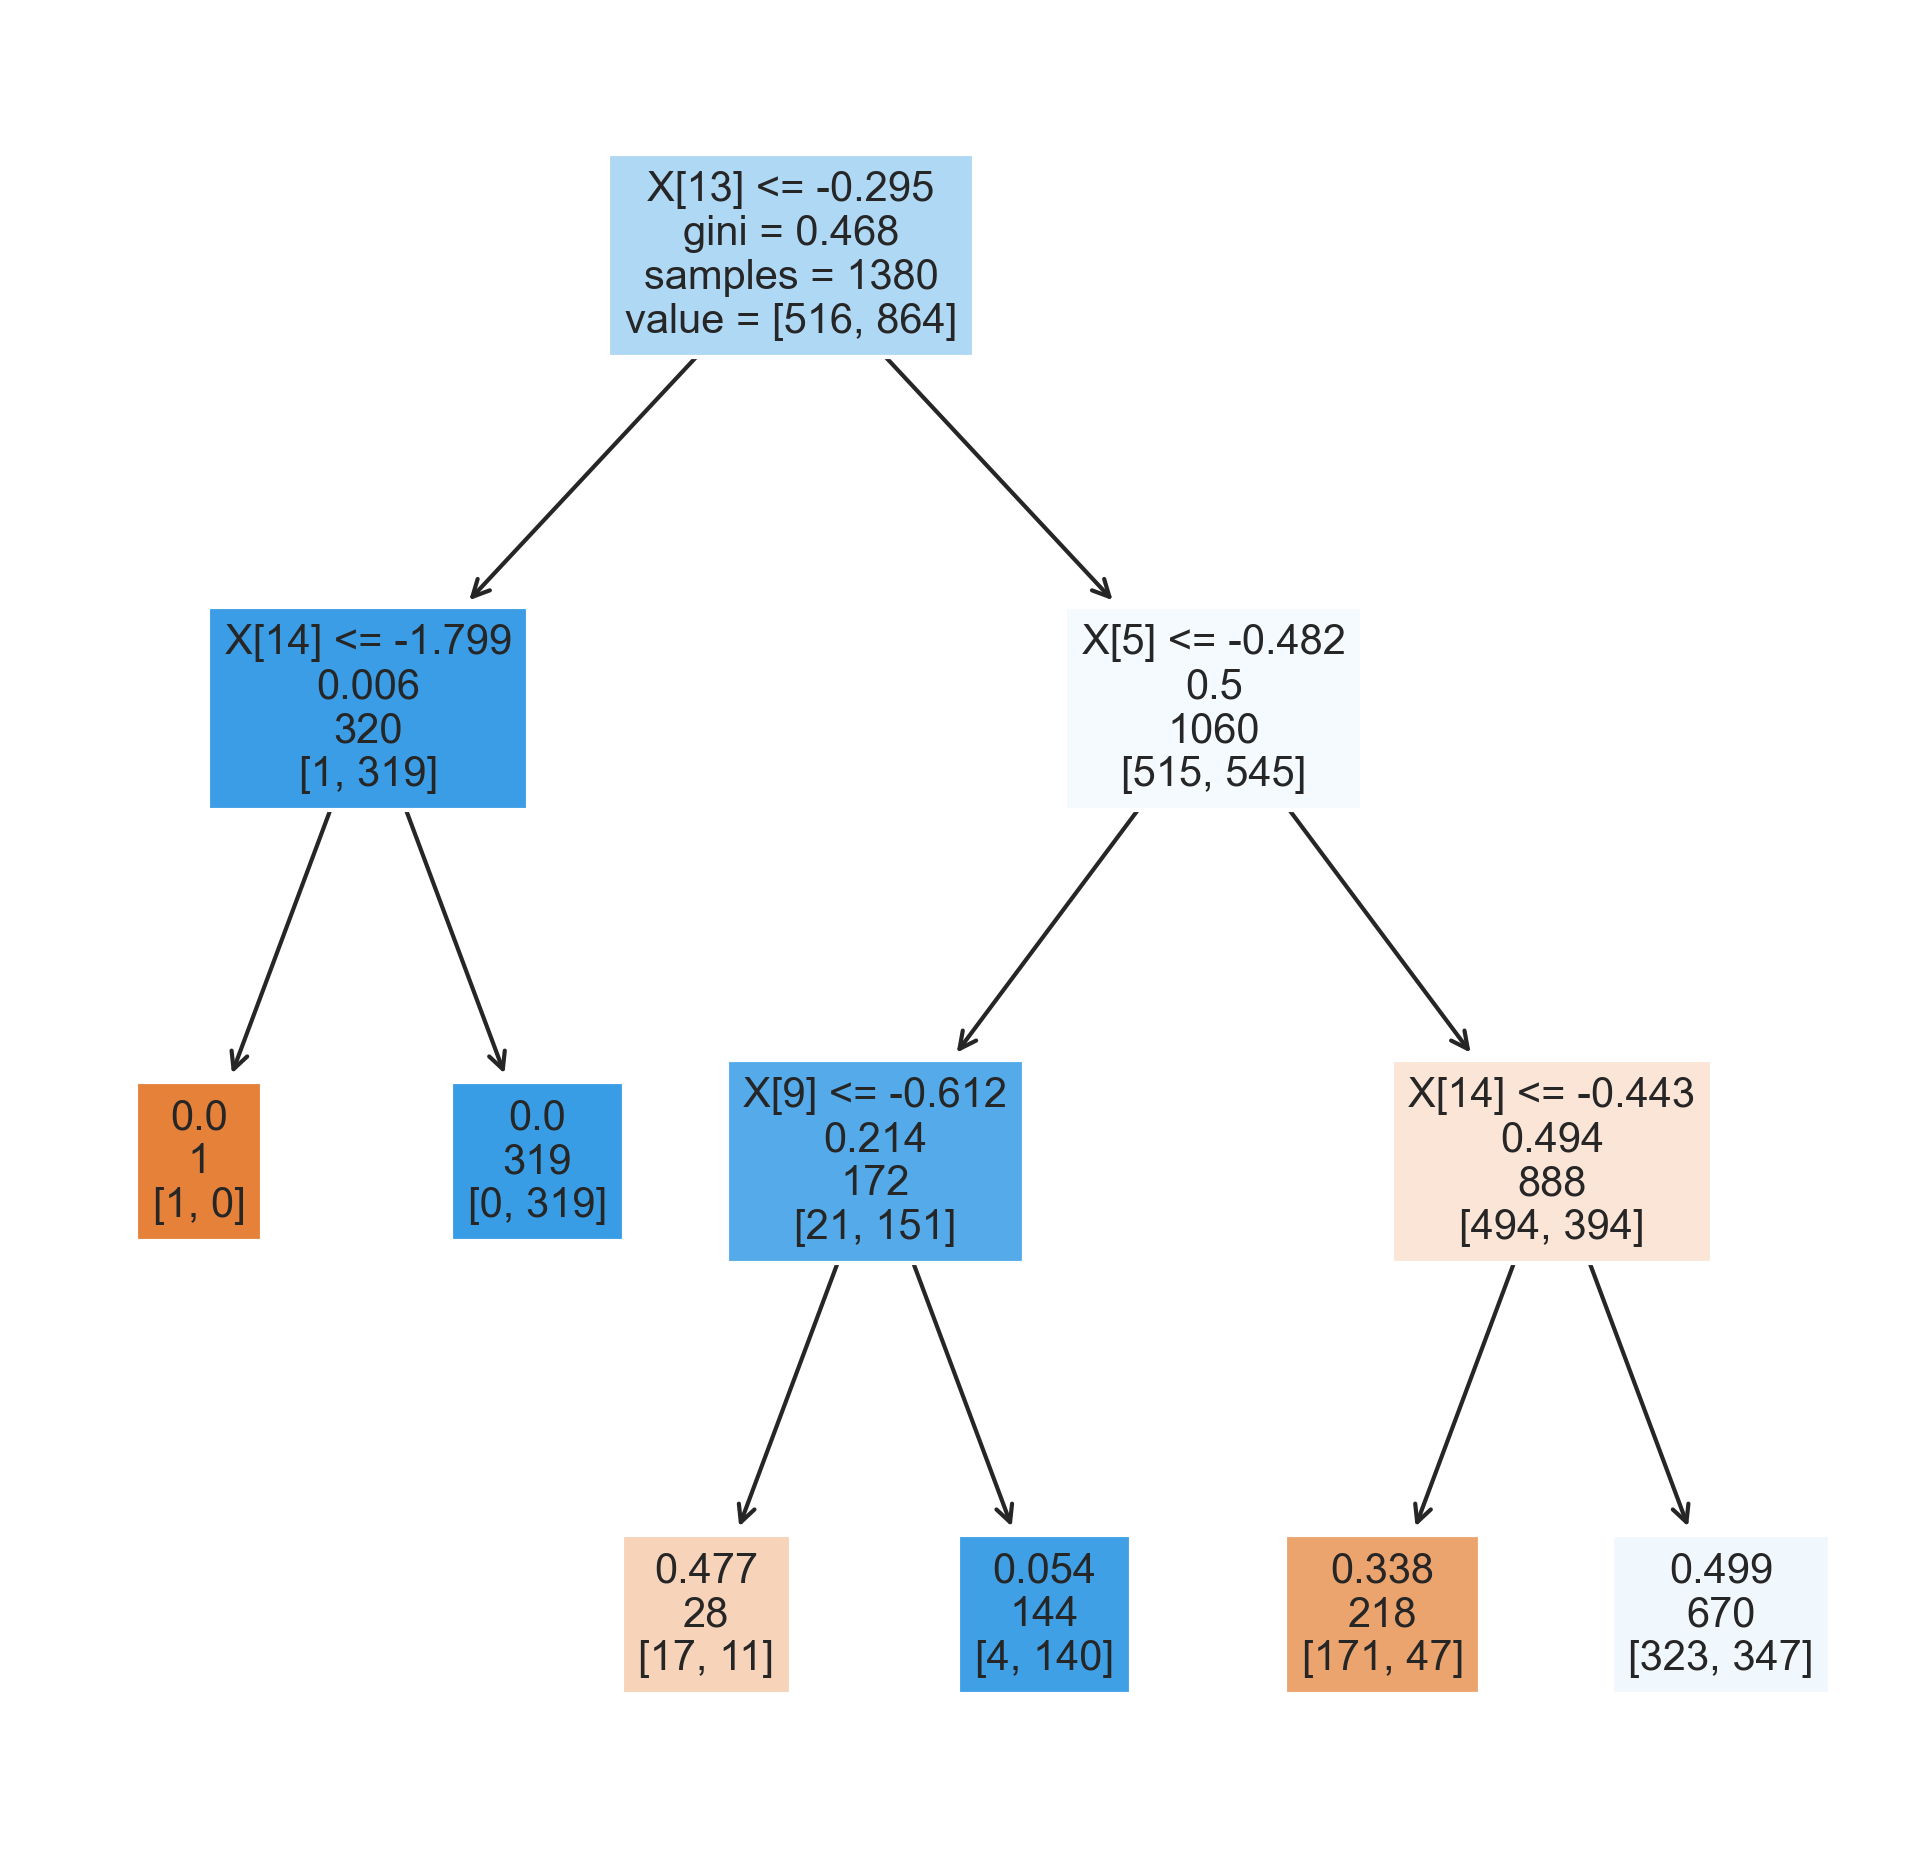

|--- Relative_Active <= -0.30
|   |--- Relative_Incident_Rate <= -1.80
|   |   |--- class: False
|   |--- Relative_Incident_Rate >  -1.80
|   |   |--- class: True
|--- Relative_Active >  -0.30
|   |--- Active <= -0.48
|   |   |--- Testing_Rate <= -0.61
|   |   |   |--- class: False
|   |   |--- Testing_Rate >  -0.61
|   |   |   |--- class: True
|   |--- Active >  -0.48
|   |   |--- Relative_Incident_Rate <= -0.44
|   |   |   |--- class: False
|   |   |--- Relative_Incident_Rate >  -0.44
|   |   |   |--- class: True



In [215]:
max_depths = [3]
covid_col = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
covid_col.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec5_tree = dec_tree.fit(x5,y5)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
    tree.plot_tree(dec5_tree, fontsize=10, label = 'root', filled = True)
    plt.show()
    
    text_representation = tree.export_text(dec5_tree, feature_names = covid_col.columns.tolist())
    print(text_representation)

### Searching for best paramter for Decision Tree for all the target label ['Recovered'] for hybrid dataset

In [216]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x5 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x5.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x5, covid['Recovered'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [217]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9282608695652174

.........................

Optimum parameters 
 {'criterion': 'gini', 'max_depth': None}

.........................

Optimum value of Max_depth 
 None


### Case Study 2B: Assuming k= 5 for k-fold cross validation; and taking target label as 'Deaths' for hybrid dataset

max_depth: 3 	Accuracy: 93.99%
max_depth: 5 	Accuracy: 94.35%
max_depth: 10 	Accuracy: 94.28%
max_depth: None 	Accuracy: 93.99%


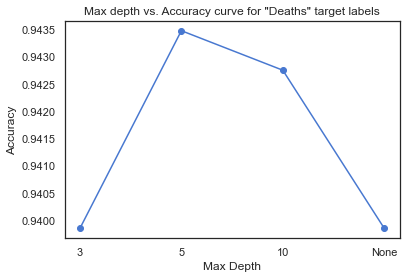

In [218]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x6 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x6.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
y6 = covid['Deaths'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    dec6_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(dec6_tree, x6, y6, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Deaths" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the hybrid covid data, we can observe that the highest accuracy of 94.35% is obtained at max_depth = 5. A similar accuracy is observed at max_depth = 10.

### Analysing the Decision Tree for "Deaths" target labels for Hybrid Covid Dataset and Max depth = 3

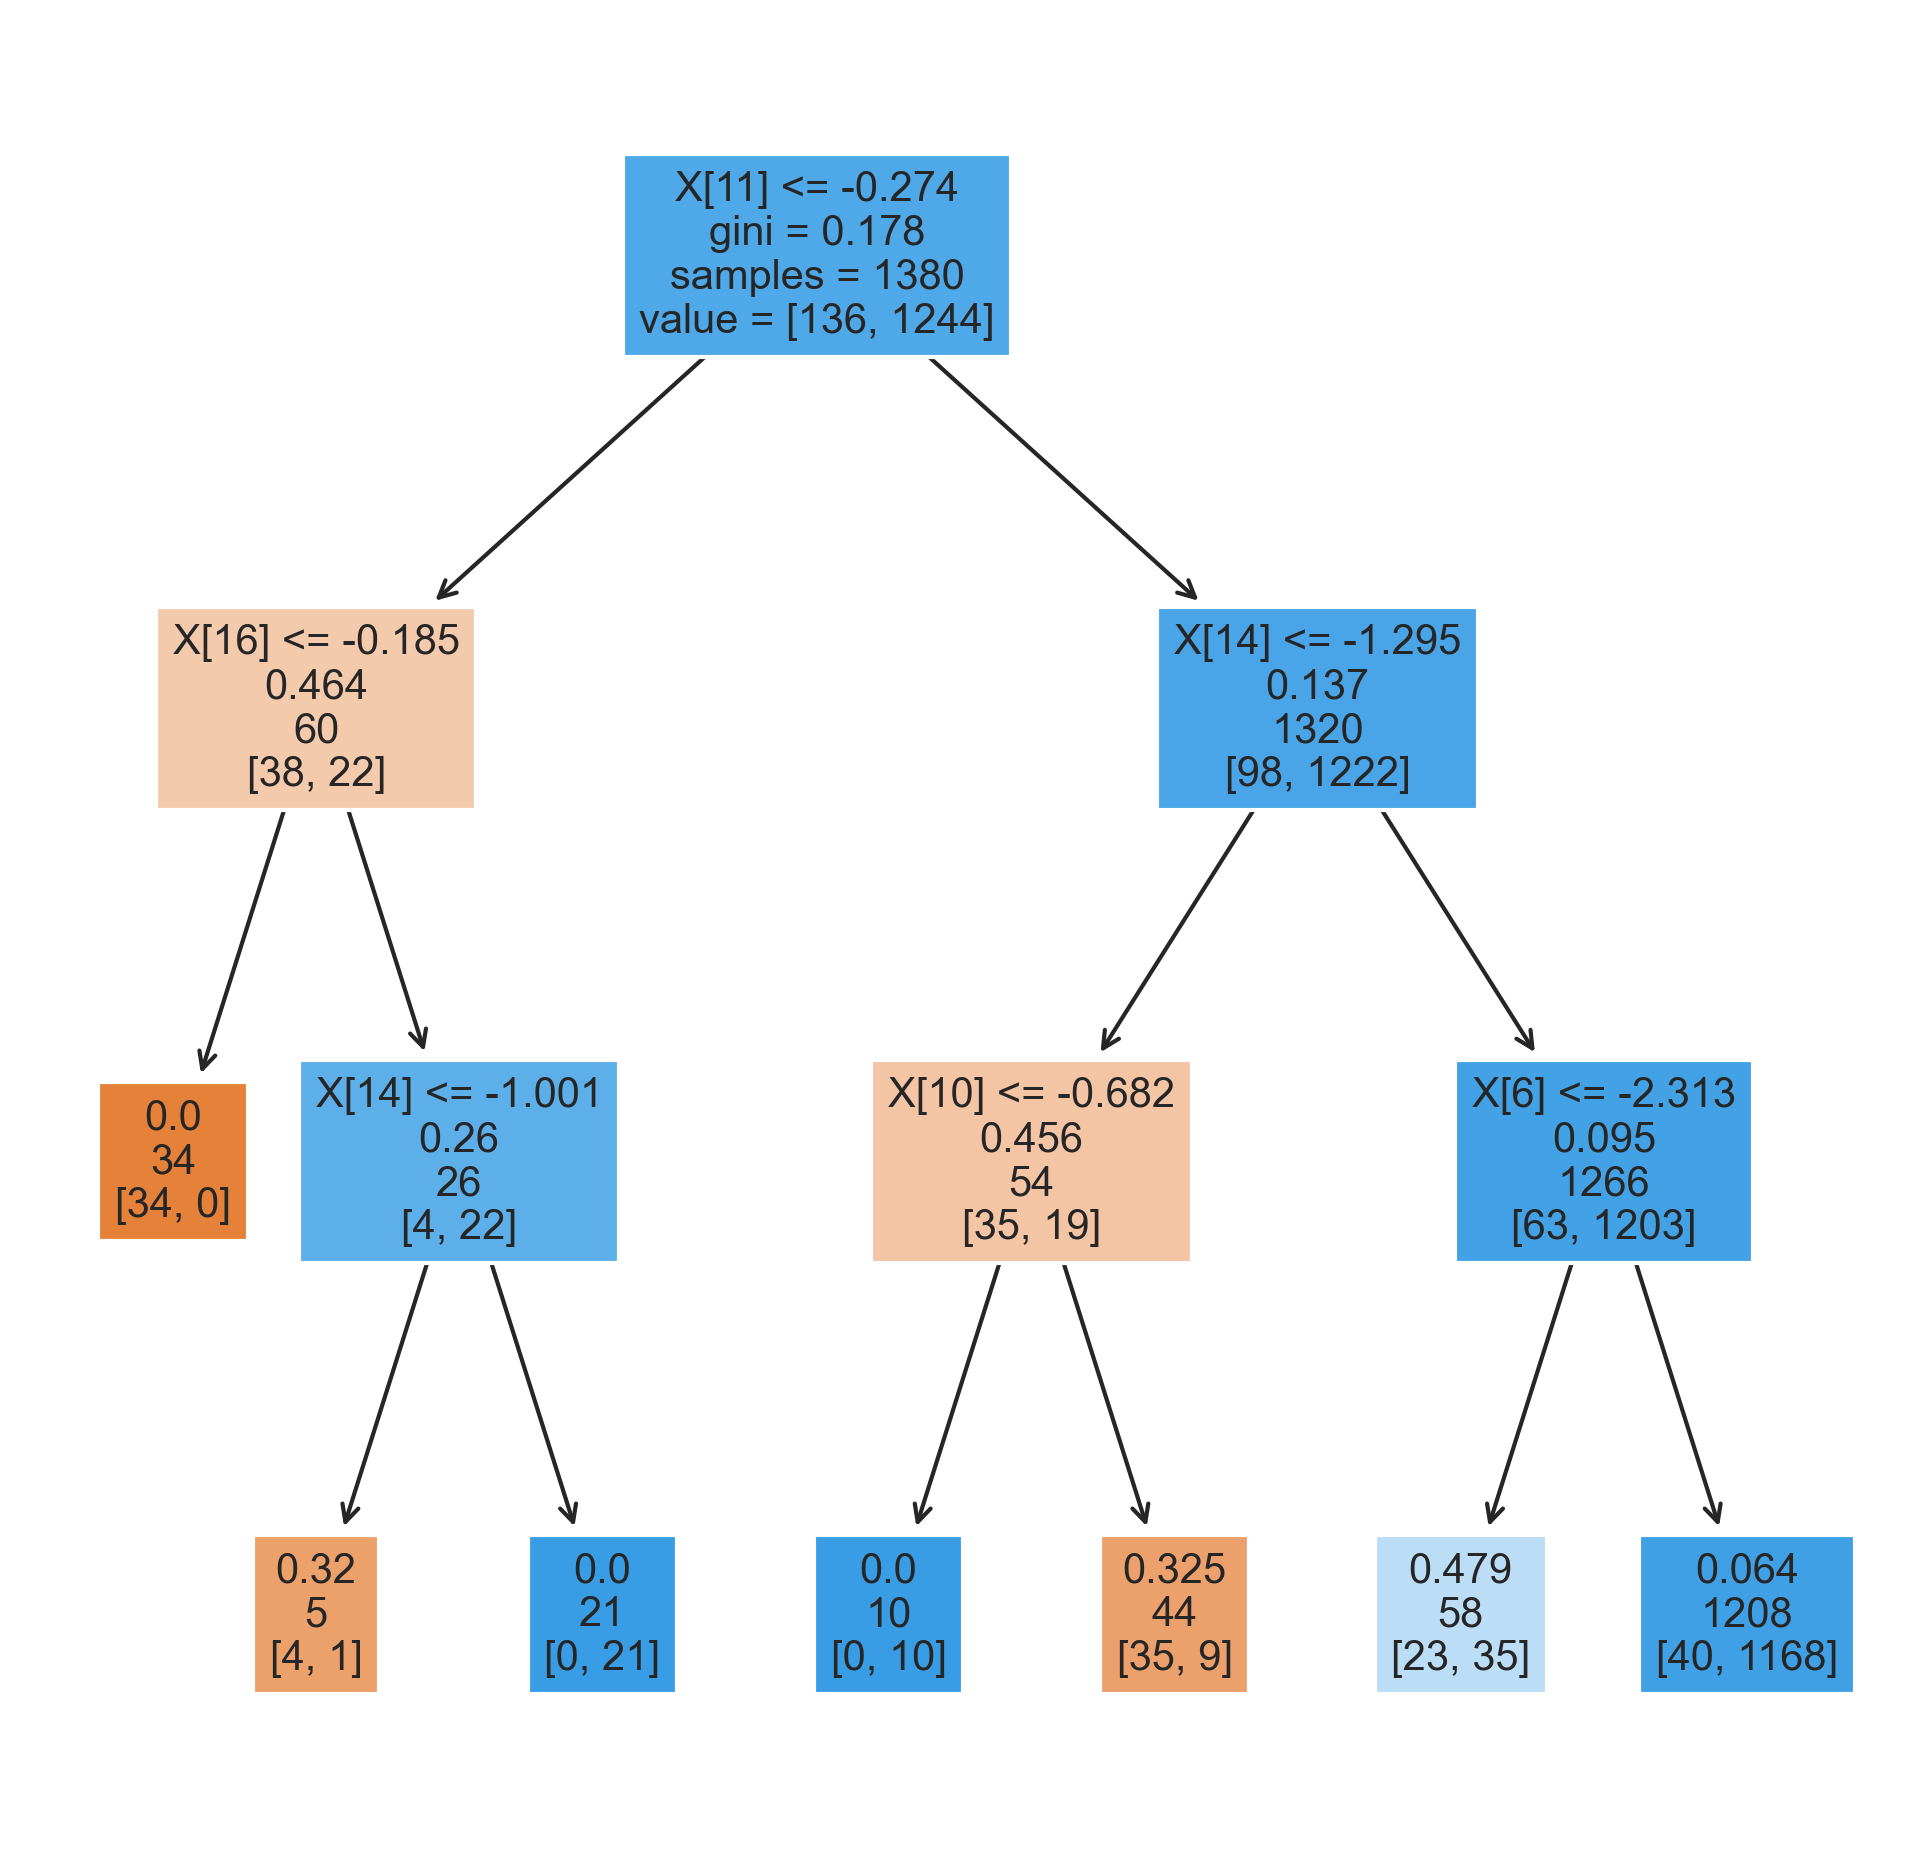

|--- Population Density 2020 Census <= -0.27
|   |--- Relative_Case_Fatality_Ratio <= -0.18
|   |   |--- class: False
|   |--- Relative_Case_Fatality_Ratio >  -0.18
|   |   |--- Relative_Incident_Rate <= -1.00
|   |   |   |--- class: False
|   |   |--- Relative_Incident_Rate >  -1.00
|   |   |   |--- class: True
|--- Population Density 2020 Census >  -0.27
|   |--- Relative_Incident_Rate <= -1.29
|   |   |--- Resident Population 2020 Census <= -0.68
|   |   |   |--- class: True
|   |   |--- Resident Population 2020 Census >  -0.68
|   |   |   |--- class: False
|   |--- Relative_Incident_Rate >  -1.29
|   |   |--- Incident_Rate <= -2.31
|   |   |   |--- class: True
|   |   |--- Incident_Rate >  -2.31
|   |   |   |--- class: True



In [219]:
max_depths = [3]
covid_col = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
covid_col.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec6_tree = dec_tree.fit(x6,y6)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
    tree.plot_tree(dec6_tree, fontsize=10, label = 'root', filled = True)
    plt.show()
    
    text_representation = tree.export_text(dec6_tree, feature_names = covid_col.columns.tolist())
    print(text_representation)

### Searching for best paramter for Decision Tree for all the target label ['Deaths'] for hybrid dataset

In [220]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x6 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x6.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x6, covid['Deaths'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [221]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9456521739130433

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 10}

.........................

Optimum value of Max_depth 
 10


### Case Study 2C: Assuming k= 5 for k-fold cross validation; and taking target label as 'Confirmed' for hybrid dataset

max_depth: 3 	Accuracy: 98.99%
max_depth: 5 	Accuracy: 98.77%
max_depth: 10 	Accuracy: 98.84%
max_depth: None 	Accuracy: 98.84%


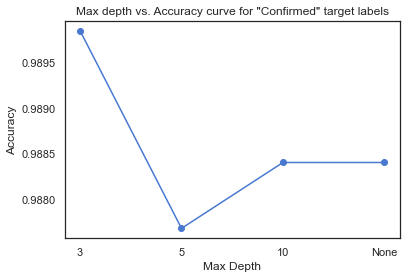

In [222]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x7 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x7.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
y7 = covid['Confirmed'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    dec7_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(dec7_tree, x7, y7, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Confirmed" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the hybrid covid data, we can observe that the highest accuracy of 98.99% is obtained at max_depth = 3. Relatively matching accuracy is observed at max_depth = 10, None.

### Analysing the Decision Tree for all the target label [ 'Confirmed'] for Hybrid Covid Dataset and Max depth = 3¶

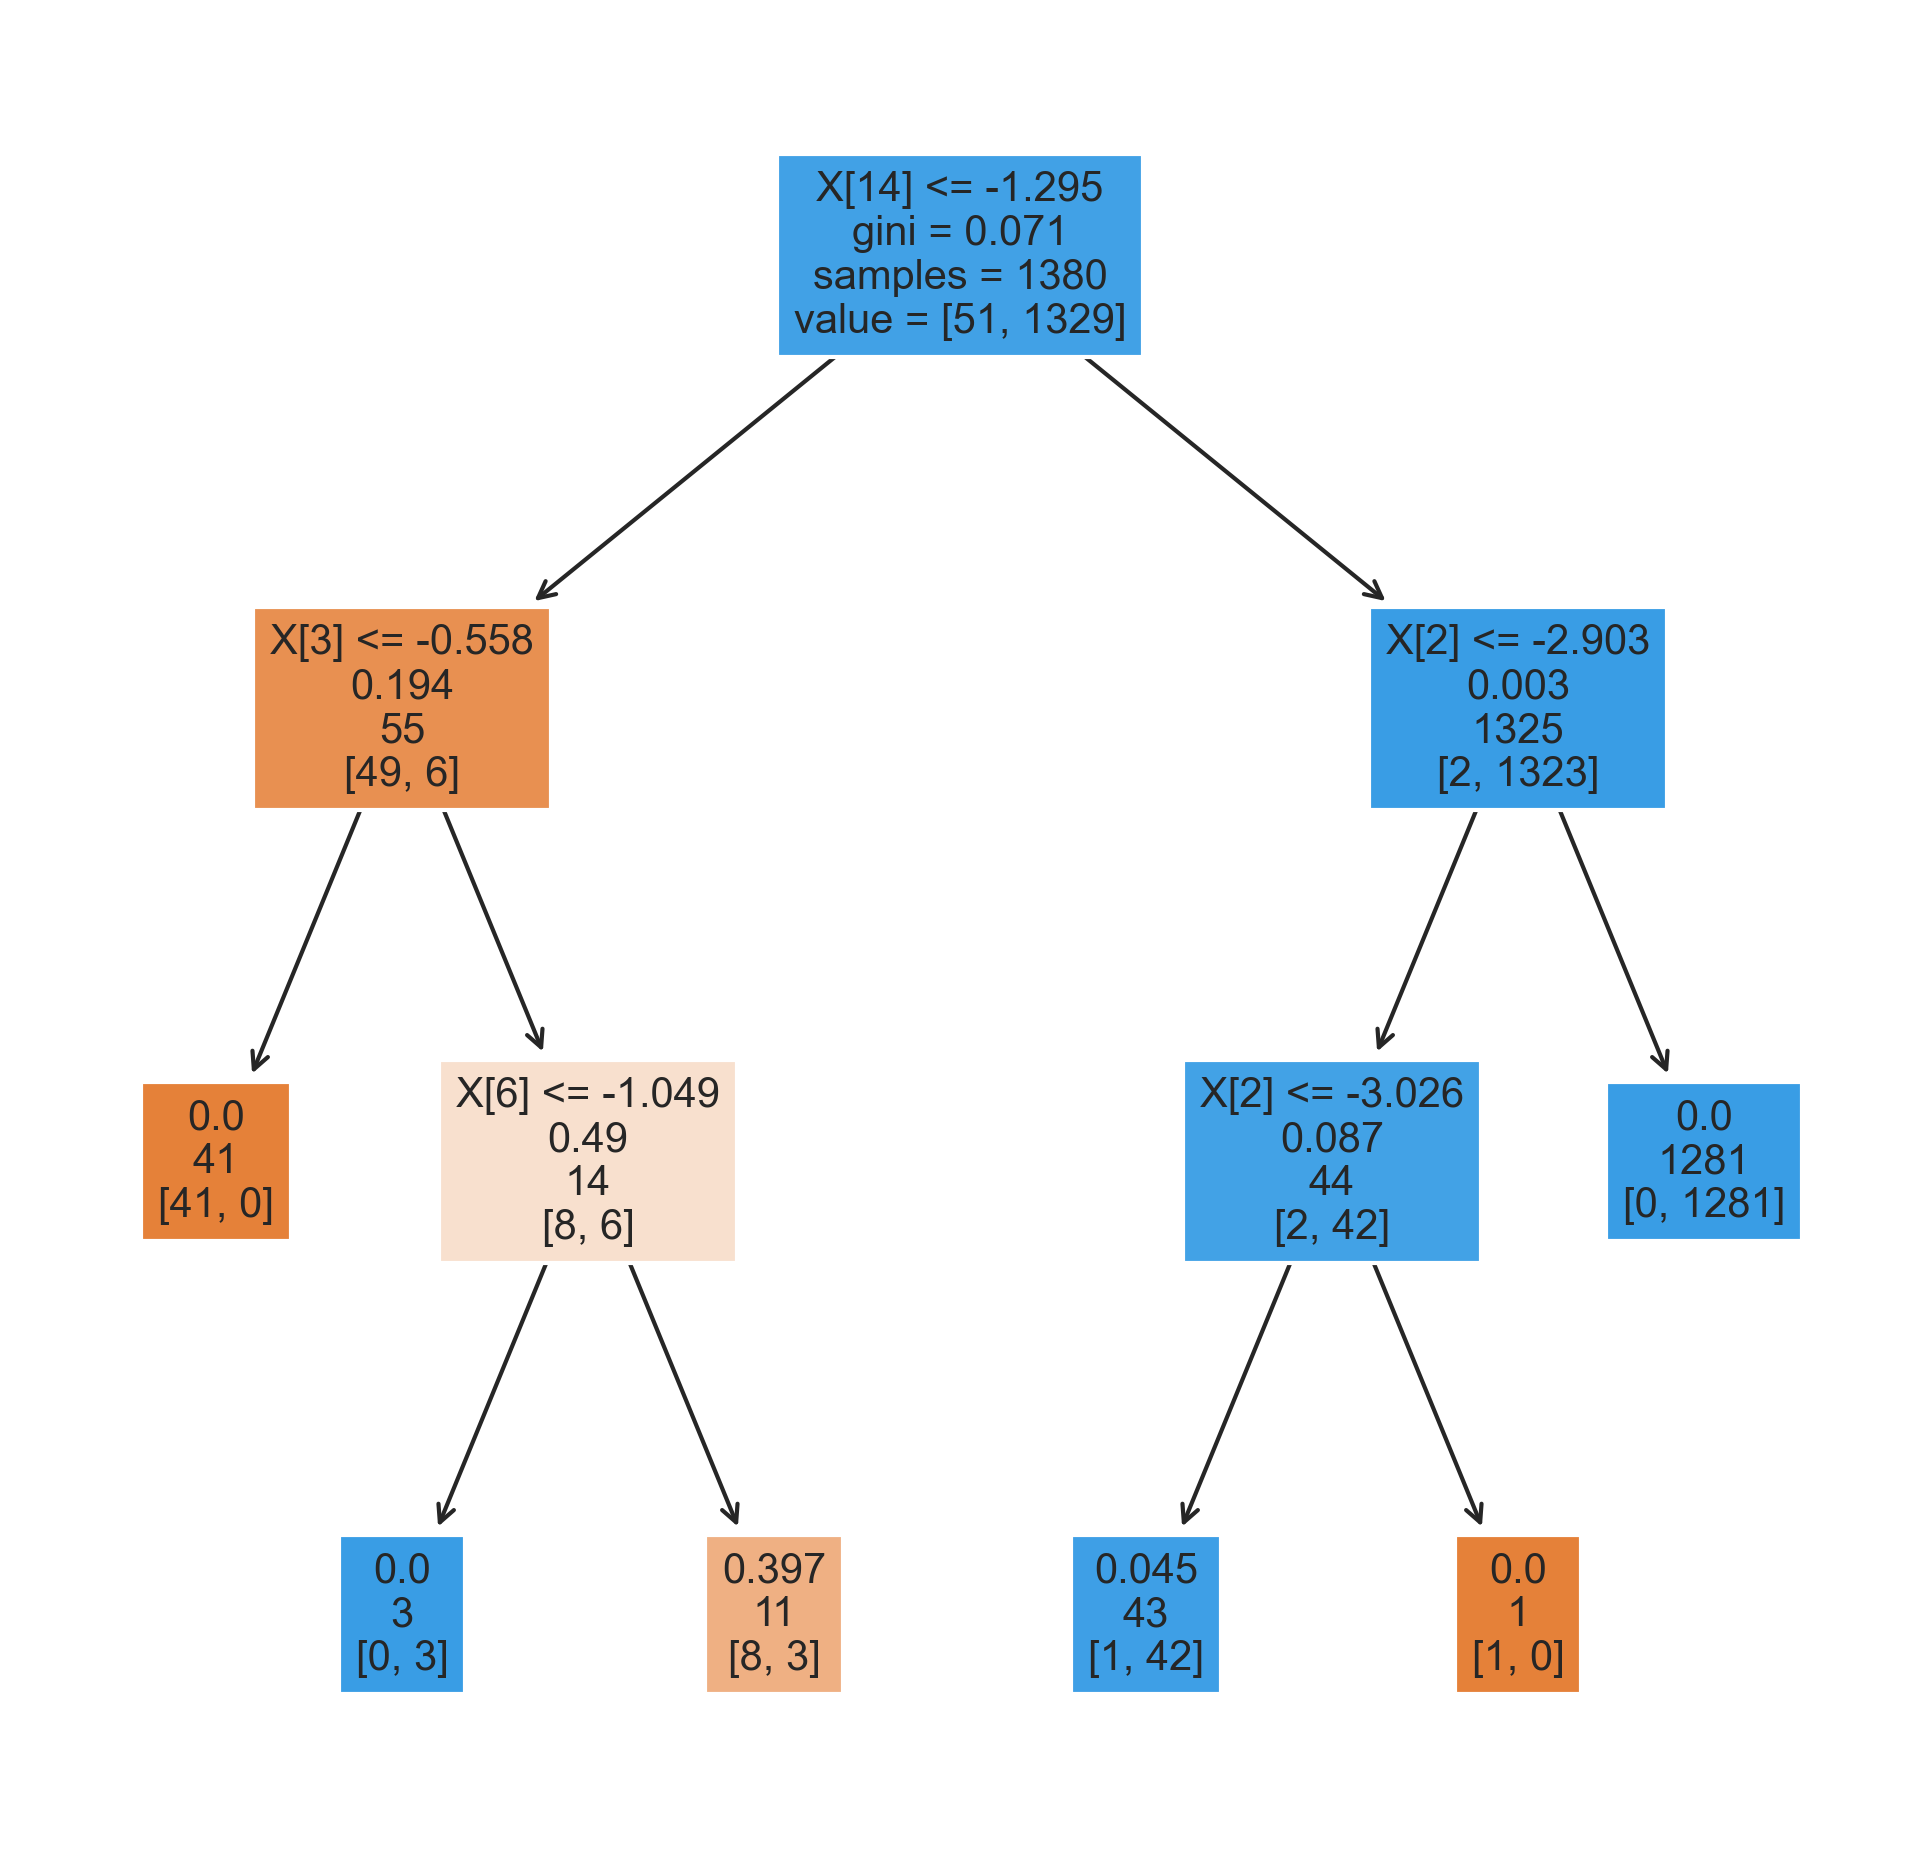

|--- Relative_Incident_Rate <= -1.29
|   |--- PC4 <= -0.56
|   |   |--- class: False
|   |--- PC4 >  -0.56
|   |   |--- Incident_Rate <= -1.05
|   |   |   |--- class: True
|   |   |--- Incident_Rate >  -1.05
|   |   |   |--- class: False
|--- Relative_Incident_Rate >  -1.29
|   |--- PC3 <= -2.90
|   |   |--- PC3 <= -3.03
|   |   |   |--- class: True
|   |   |--- PC3 >  -3.03
|   |   |   |--- class: False
|   |--- PC3 >  -2.90
|   |   |--- class: True



In [223]:
max_depths = [3]
covid_col = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
covid_col.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec7_tree = dec_tree.fit(x7,y7)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
    tree.plot_tree(dec7_tree, fontsize=10, label = 'root', filled = True)
    plt.show()
    
    text_representation = tree.export_text(dec7_tree, feature_names = covid_col.columns.tolist())
    print(text_representation)

### Searching for best paramter for Decision Tree for the target label ['Confirmed'] for hybrid dataset

In [224]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x7 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x7.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x7, covid['Confirmed'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [225]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9934782608695653

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 10}

.........................

Optimum value of Max_depth 
 10


### Case Study 2D: Assuming k= 5 for k-fold cross validation; and taking all the three target labels: 'Recovered', 'Confirmed' and 'Deaths'

In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree

max_depth: 3 	Accuracy: 94.78%
max_depth: 5 	Accuracy: 95.00%
max_depth: 10 	Accuracy: 93.99%
max_depth: None 	Accuracy: 93.48%


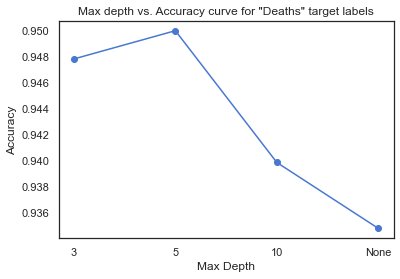

In [227]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x8 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']]).join(covid[['Recovered', 'Confirmed']])
x8.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate','Recovered', 'Confirmed']
y8 = covid['Deaths'].values

max_depths = [3,5,10,None]
acc = []

for max_depth in max_depths:
    dec8_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    outcome_kfold = cross_val_score(dec8_tree, x8, y8, cv=kFold)
    print("max_depth:", max_depth, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
    
plt.plot(range(len(max_depths)),acc, '-o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max depth vs. Accuracy curve for "Deaths" target labels')
    
plt.xticks(ticks=range(len(max_depths)),labels=['3','5','10','None'])
plt.show()

### For the hybrid covid data, we can observe that the highest accuracy of 95.00% is obtained at max_depth = 5. We also note that there is a relatively similar accuracy obtained at max_depth = 3.

### Analysing the Decision Tree for all the three target labels ['Recovered', 'Deaths', 'Confirmed'] for Hybrid Covid Dataset and Max depth = 3

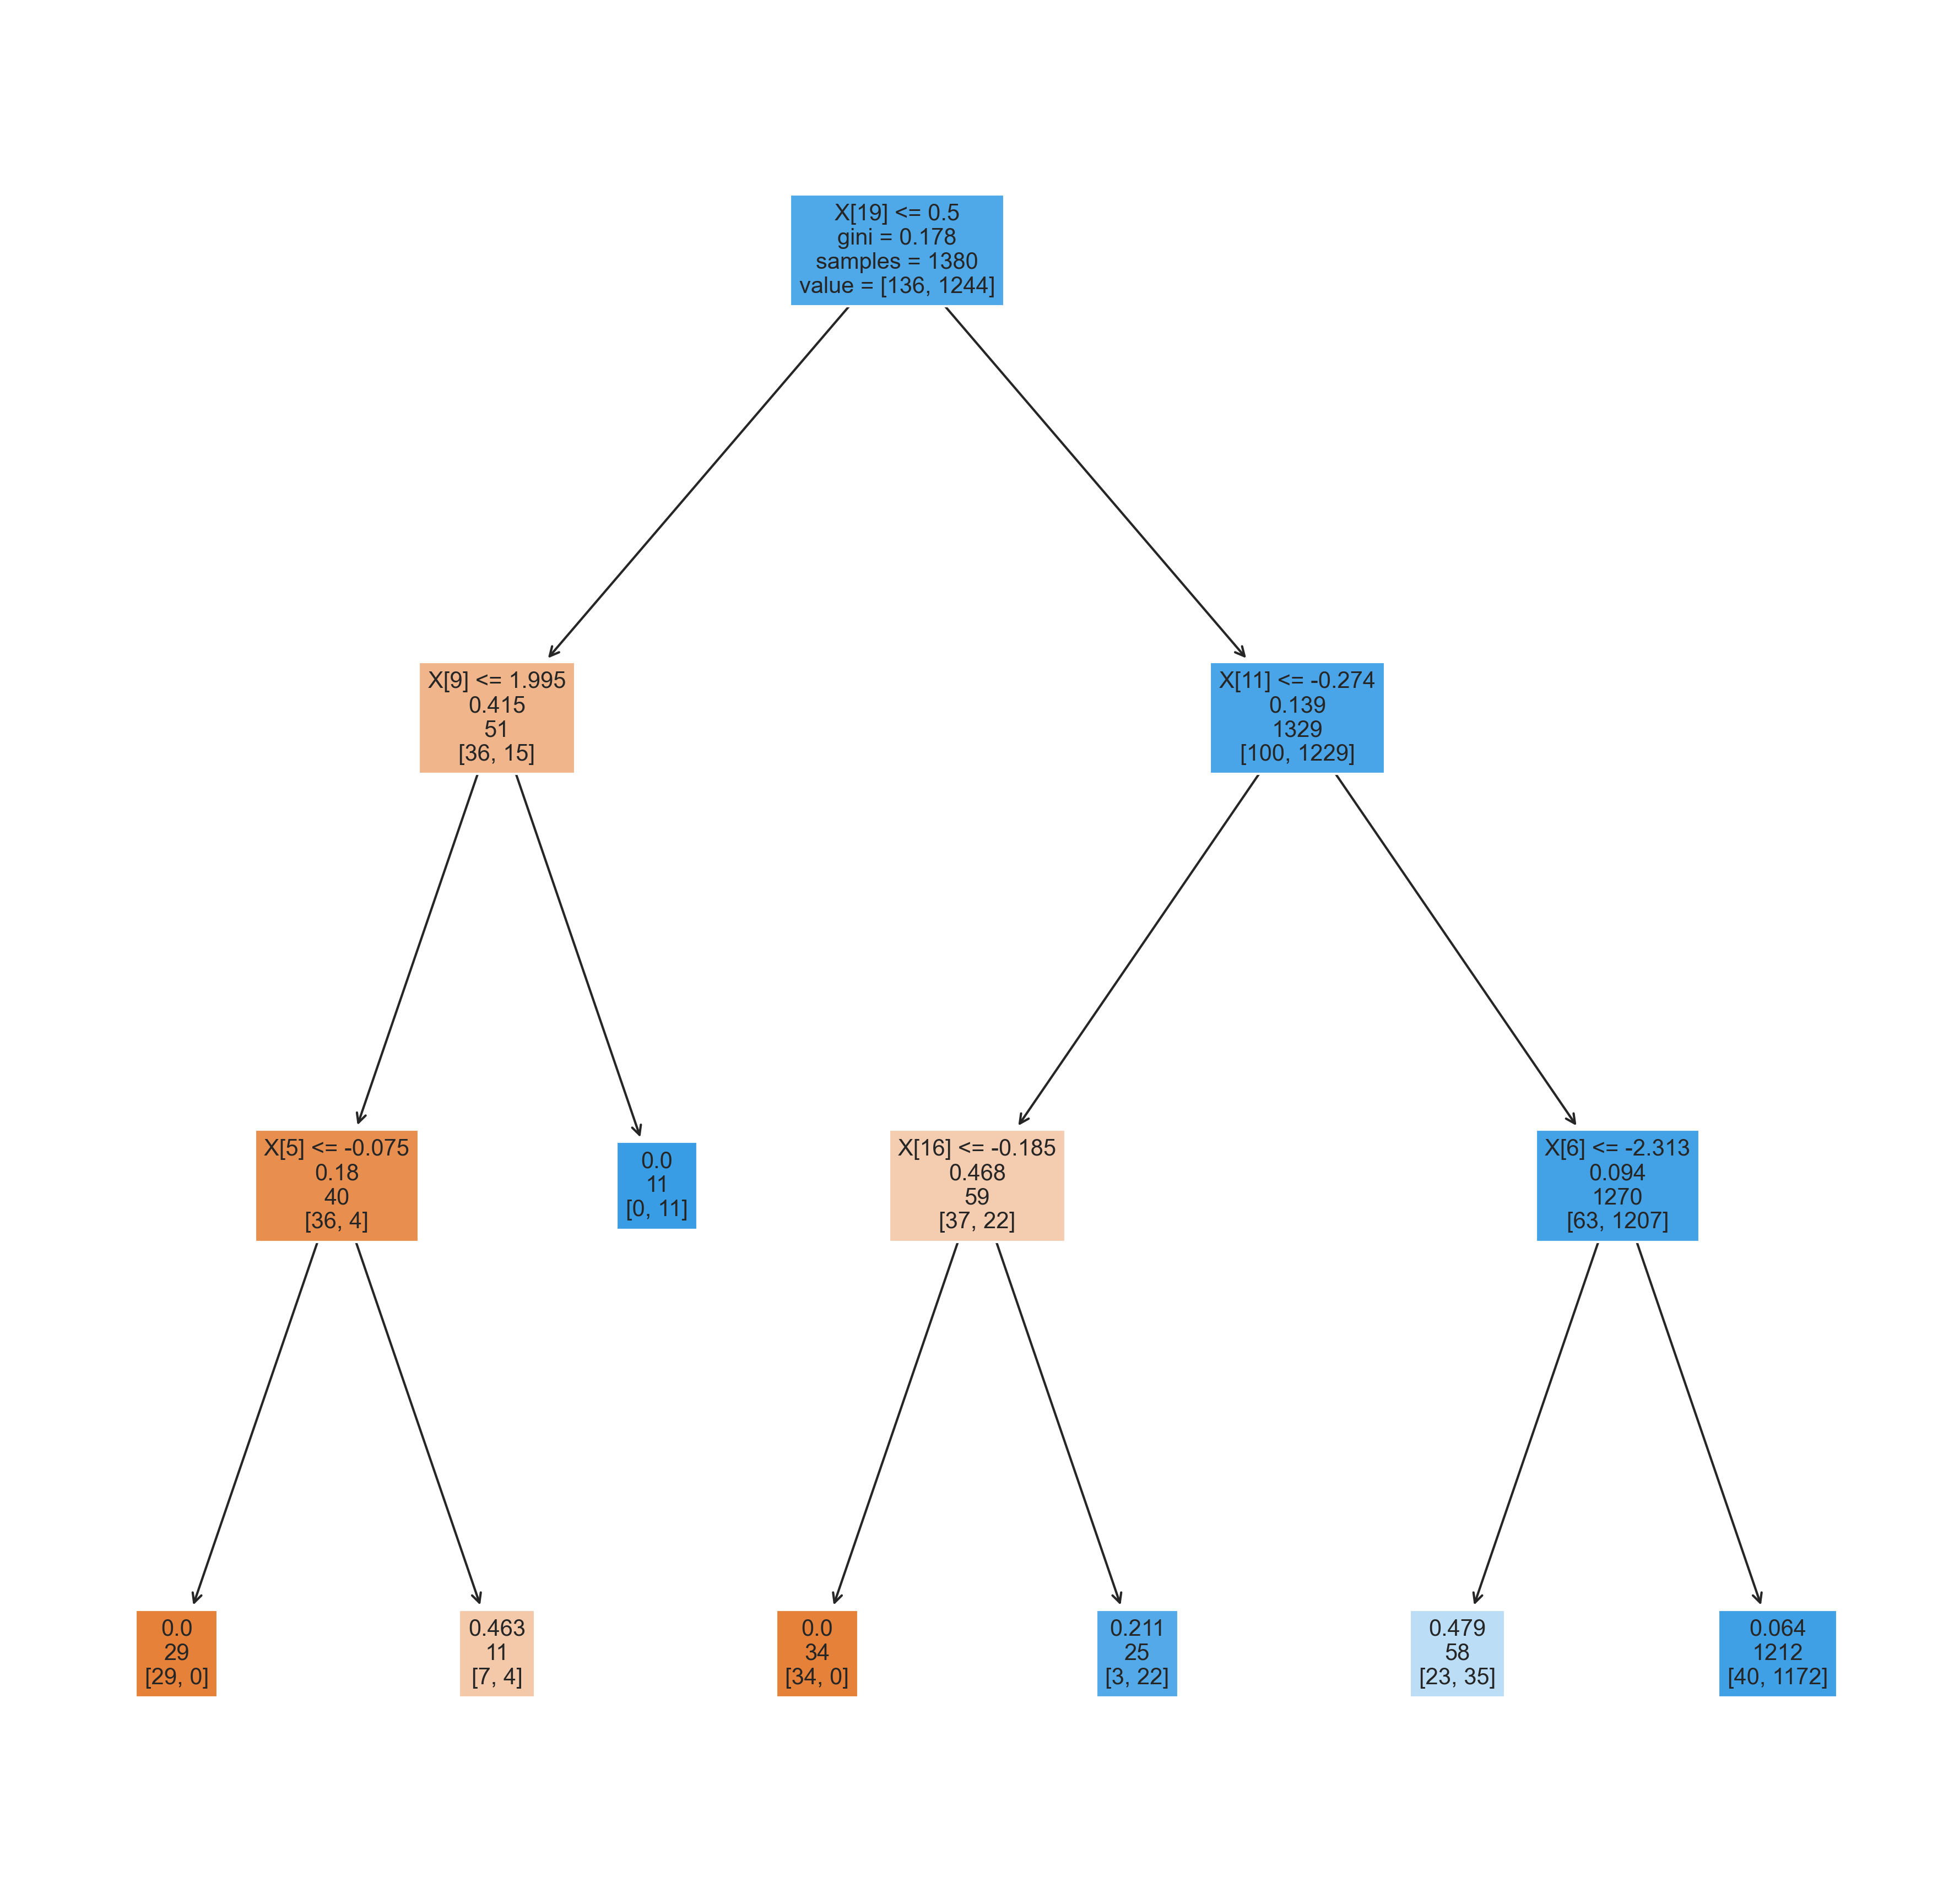

|--- Confirmed <= 0.50
|   |--- Testing_Rate <= 2.00
|   |   |--- Active <= -0.08
|   |   |   |--- class: False
|   |   |--- Active >  -0.08
|   |   |   |--- class: False
|   |--- Testing_Rate >  2.00
|   |   |--- class: True
|--- Confirmed >  0.50
|   |--- Population Density 2020 Census <= -0.27
|   |   |--- Relative_Case_Fatality_Ratio <= -0.18
|   |   |   |--- class: False
|   |   |--- Relative_Case_Fatality_Ratio >  -0.18
|   |   |   |--- class: True
|   |--- Population Density 2020 Census >  -0.27
|   |   |--- Incident_Rate <= -2.31
|   |   |   |--- class: True
|   |   |--- Incident_Rate >  -2.31
|   |   |   |--- class: True



In [228]:
max_depths = [3]
covid_col = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']]).join(covid[['Recovered', 'Confirmed']])
covid_col.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate','Recovered', 'Confirmed']
for max_depth in max_depths:
    dec_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dec8_tree = dec_tree.fit(x8,y8)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
    tree.plot_tree(dec8_tree, fontsize=10, label = 'root', filled = True)
    plt.show()
    
    text_representation = tree.export_text(dec8_tree, feature_names = covid_col.columns.tolist())
    print(text_representation)

### Searching for best paramter for Decision Tree for all the three target labels ['Recovered', 'Deaths', 'Confirmed'] for Hybrid Covid Dataset

In [229]:
params_dict = {"max_depth": [3, 5, 10, None],
               "criterion": ['gini', 'entropy']}
model_tree = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
x8 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']]).join(covid[['Recovered', 'Confirmed']])
x8.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate','Recovered', 'Confirmed']
grid = GridSearchCV(model_tree,param_grid = params_dict, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x8, covid['Deaths'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None]},
             verbose=1)

### Finding the best hyperparameter

In [230]:
TrainedGridOutcome(grid = grid)

Best Accuracy: 
 0.9449275362318842

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 10}

.........................

Optimum value of Max_depth 
 10


### Final Observations from Decision Tree Analysis:

#### 1. Any node gets divided into sub nodes with lower cumulative gini error.
#### 2. The tree depth contributes to the better performance.
#### 3. There is a correlation between Population density, Active cases, Case_Fatality_Ratio and Incident_Case as it shows in root nodes, and further sub nodes for decision tree.

# [CM4] Random Forest Classifier

#### Utilities:

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

def TrainedRFOutcome(grid):
    optimum_param = grid.best_estimator_.get_params()
    print("Best Accuracy: \n", grid.best_score_)
    print("\n.........................\n")
    print("Optimum parameters \n", grid.best_params_)
    print("\n.........................\n")
    print("Optimum value of Max_depth \n", grid.best_params_['max_depth'])
    print('Best No. of Trees \n', grid.best_params_['n_estimators'])

### Case Study 3: Using Original Covid Dataset 
### Case Study 3a: For class "Recovered"

num_trees: 5 	max_depth: 3 	Accuracy:86.23%
num_trees: 5 	max_depth: 5 	Accuracy:95.51%
num_trees: 5 	max_depth: 10 	Accuracy:97.25%
num_trees: 5 	max_depth: None 	Accuracy:96.96%
num_trees: 10 	max_depth: 3 	Accuracy:86.67%
num_trees: 10 	max_depth: 5 	Accuracy:96.01%
num_trees: 10 	max_depth: 10 	Accuracy:97.68%
num_trees: 10 	max_depth: None 	Accuracy:97.68%
num_trees: 50 	max_depth: 3 	Accuracy:88.12%
num_trees: 50 	max_depth: 5 	Accuracy:96.88%
num_trees: 50 	max_depth: 10 	Accuracy:97.97%
num_trees: 50 	max_depth: None 	Accuracy:98.04%
num_trees: 150 	max_depth: 3 	Accuracy:89.57%
num_trees: 150 	max_depth: 5 	Accuracy:97.32%
num_trees: 150 	max_depth: 10 	Accuracy:97.83%
num_trees: 150 	max_depth: None 	Accuracy:98.04%
num_trees: 200 	max_depth: 3 	Accuracy:89.42%
num_trees: 200 	max_depth: 5 	Accuracy:97.54%
num_trees: 200 	max_depth: 10 	Accuracy:97.90%
num_trees: 200 	max_depth: None 	Accuracy:97.97%


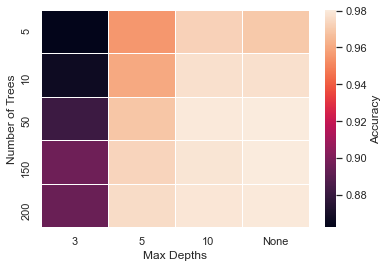

In [232]:
kFold = KFold(n_splits = 10, shuffle = True, random_state=0)
x9 = scaled_covid.values
y9 = covid['Recovered'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran1_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran1_forest, x9, y9, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap, we note that the highest accuracy of 98.04% for "Recovered" class is observed at Maximum depth = None,  and number of trees = 50 or 150 when we remove the longitude and latitude values from the covid features dataset.  

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Recovered" class

In [233]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x9 = scaled_covid.values
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x9, covid['Recovered'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [234]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.9702898550724639

.........................

Optimum parameters 
 {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}

.........................

Optimum value of Max_depth 
 None
Best No. of Trees 
 50


### Case Study 3b: For class "Deaths"

num_trees: 5 	max_depth: 3 	Accuracy:91.59%
num_trees: 5 	max_depth: 5 	Accuracy:94.57%
num_trees: 5 	max_depth: 10 	Accuracy:94.06%
num_trees: 5 	max_depth: None 	Accuracy:94.28%
num_trees: 10 	max_depth: 3 	Accuracy:92.75%
num_trees: 10 	max_depth: 5 	Accuracy:94.71%
num_trees: 10 	max_depth: 10 	Accuracy:94.78%
num_trees: 10 	max_depth: None 	Accuracy:95.22%
num_trees: 50 	max_depth: 3 	Accuracy:93.12%
num_trees: 50 	max_depth: 5 	Accuracy:94.28%
num_trees: 50 	max_depth: 10 	Accuracy:95.58%
num_trees: 50 	max_depth: None 	Accuracy:95.58%
num_trees: 150 	max_depth: 3 	Accuracy:93.19%
num_trees: 150 	max_depth: 5 	Accuracy:94.49%
num_trees: 150 	max_depth: 10 	Accuracy:95.43%
num_trees: 150 	max_depth: None 	Accuracy:95.51%
num_trees: 200 	max_depth: 3 	Accuracy:93.19%
num_trees: 200 	max_depth: 5 	Accuracy:94.57%
num_trees: 200 	max_depth: 10 	Accuracy:95.43%
num_trees: 200 	max_depth: None 	Accuracy:95.51%


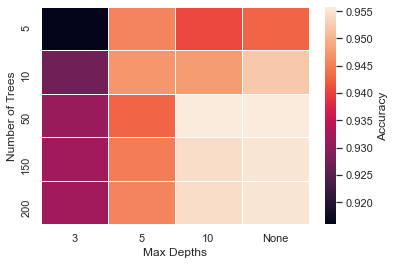

In [235]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x10 = scaled_covid.values
y10 = covid['Deaths'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran2_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran2_forest, x10, y10, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap, we note that the highest accuracy of 95.58% for "Deaths" class is observed at Maximum depth = 10 and None, and number of trees = 50 when we remove the longitude and latitude values from the covid features dataset. We can also note that the accuracy for other number of trees, such as max_depth = None and number of trees = 150 and 200 are quite close to the highest accuracy as well. 

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Deaths" class

In [236]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x10 = scaled_covid.values
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x10, covid['Deaths'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [237]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.960144927536232

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}

.........................

Optimum value of Max_depth 
 None
Best No. of Trees 
 200


### Case Study 3c: For class "Confirmed"

num_trees: 5 	max_depth: 3 	Accuracy:98.99%
num_trees: 5 	max_depth: 5 	Accuracy:98.99%
num_trees: 5 	max_depth: 10 	Accuracy:99.20%
num_trees: 5 	max_depth: None 	Accuracy:99.20%
num_trees: 10 	max_depth: 3 	Accuracy:99.20%
num_trees: 10 	max_depth: 5 	Accuracy:99.06%
num_trees: 10 	max_depth: 10 	Accuracy:99.35%
num_trees: 10 	max_depth: None 	Accuracy:99.35%
num_trees: 50 	max_depth: 3 	Accuracy:99.42%
num_trees: 50 	max_depth: 5 	Accuracy:99.57%
num_trees: 50 	max_depth: 10 	Accuracy:99.64%
num_trees: 50 	max_depth: None 	Accuracy:99.64%
num_trees: 150 	max_depth: 3 	Accuracy:99.42%
num_trees: 150 	max_depth: 5 	Accuracy:99.64%
num_trees: 150 	max_depth: 10 	Accuracy:99.49%
num_trees: 150 	max_depth: None 	Accuracy:99.49%
num_trees: 200 	max_depth: 3 	Accuracy:99.49%
num_trees: 200 	max_depth: 5 	Accuracy:99.64%
num_trees: 200 	max_depth: 10 	Accuracy:99.42%
num_trees: 200 	max_depth: None 	Accuracy:99.42%


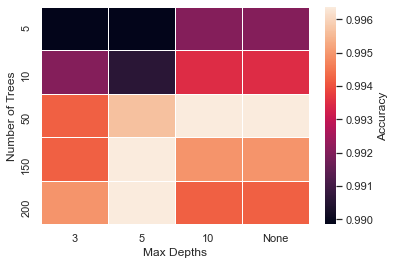

In [238]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x11 = scaled_covid.values
y11 = covid['Confirmed'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran3_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran3_forest, x11, y11, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap, we note that the highest accuracy of 99.64% for "Confirmed" class is observed at Maximum depth = 10, and number of trees = 50; and at Maximum depth = 10 or None and number of trees = 50 as well as at Maximum depth = 5 and number of trees = 150 and 200.  

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Confirmed" class

In [239]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x11 = scaled_covid.values
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x11, covid['Confirmed'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [240]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.9956521739130435

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 10}

.........................

Optimum value of Max_depth 
 10
Best No. of Trees 
 10


### Case Study 4: Using Hybrid Covid Dataset (PCA Features for Classification, 5 Principal Components)

### Case Study 4a: For class "Recovered"

num_trees: 5 	max_depth: 3 	Accuracy:79.64%
num_trees: 5 	max_depth: 5 	Accuracy:88.91%
num_trees: 5 	max_depth: 10 	Accuracy:96.96%
num_trees: 5 	max_depth: None 	Accuracy:95.94%
num_trees: 10 	max_depth: 3 	Accuracy:80.43%
num_trees: 10 	max_depth: 5 	Accuracy:90.22%
num_trees: 10 	max_depth: 10 	Accuracy:97.68%
num_trees: 10 	max_depth: None 	Accuracy:96.59%
num_trees: 50 	max_depth: 3 	Accuracy:85.43%
num_trees: 50 	max_depth: 5 	Accuracy:94.28%
num_trees: 50 	max_depth: 10 	Accuracy:98.26%
num_trees: 50 	max_depth: None 	Accuracy:97.97%
num_trees: 150 	max_depth: 3 	Accuracy:85.00%
num_trees: 150 	max_depth: 5 	Accuracy:95.22%
num_trees: 150 	max_depth: 10 	Accuracy:98.12%
num_trees: 150 	max_depth: None 	Accuracy:97.97%
num_trees: 200 	max_depth: 3 	Accuracy:85.51%
num_trees: 200 	max_depth: 5 	Accuracy:94.93%
num_trees: 200 	max_depth: 10 	Accuracy:98.04%
num_trees: 200 	max_depth: None 	Accuracy:97.97%


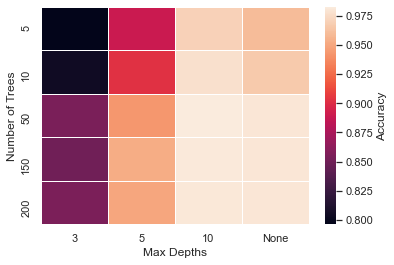

In [241]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x12 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x12.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
y12 = covid['Recovered'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran4_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran4_forest, x12, y12, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap for Hybrid covid dataset, we note that the highest accuracy of 98.26% for "Recovered" class is observed at Maximum depth = 10 and number of trees = 50. We also observe that a relatively similar accuracy is obtained at number of trees 150 and maximum depth = 10 for "Recovered" class.

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Recovered" class in Hybrid dataset

In [242]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x12 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x12.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x12, covid['Recovered'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [243]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.9652173913043478

.........................

Optimum parameters 
 {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}

.........................

Optimum value of Max_depth 
 None
Best No. of Trees 
 200


### Case Study 4b: For class "Deaths"

num_trees: 5 	max_depth: 3 	Accuracy:92.68%
num_trees: 5 	max_depth: 5 	Accuracy:93.19%
num_trees: 5 	max_depth: 10 	Accuracy:93.62%
num_trees: 5 	max_depth: None 	Accuracy:93.19%
num_trees: 10 	max_depth: 3 	Accuracy:93.26%
num_trees: 10 	max_depth: 5 	Accuracy:94.20%
num_trees: 10 	max_depth: 10 	Accuracy:94.64%
num_trees: 10 	max_depth: None 	Accuracy:94.71%
num_trees: 50 	max_depth: 3 	Accuracy:93.04%
num_trees: 50 	max_depth: 5 	Accuracy:94.28%
num_trees: 50 	max_depth: 10 	Accuracy:95.65%
num_trees: 50 	max_depth: None 	Accuracy:95.22%
num_trees: 150 	max_depth: 3 	Accuracy:92.90%
num_trees: 150 	max_depth: 5 	Accuracy:94.64%
num_trees: 150 	max_depth: 10 	Accuracy:95.72%
num_trees: 150 	max_depth: None 	Accuracy:95.43%
num_trees: 200 	max_depth: 3 	Accuracy:92.83%
num_trees: 200 	max_depth: 5 	Accuracy:94.71%
num_trees: 200 	max_depth: 10 	Accuracy:95.72%
num_trees: 200 	max_depth: None 	Accuracy:95.58%


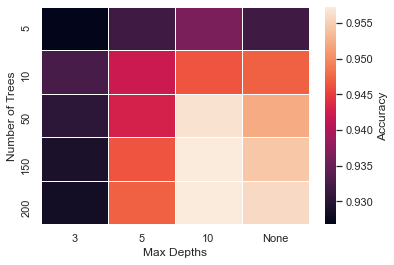

In [244]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x13 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x13.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
y13 = covid['Deaths'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran4_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran4_forest, x13, y13, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap for Hybrid covid dataset, we note that the highest accuracy of 95.72% for "Deaths" class is observed at Maximum depth = 10, and number of trees = 150, 200.

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Deaths" class in Hybrid dataset

In [245]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x13 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x13.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x13, covid['Deaths'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [246]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.9594202898550724

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}

.........................

Optimum value of Max_depth 
 10
Best No. of Trees 
 200


### Case Study 4c: For class "Confirmed"

num_trees: 5 	max_depth: 3 	Accuracy:99.35%
num_trees: 5 	max_depth: 5 	Accuracy:99.20%
num_trees: 5 	max_depth: 10 	Accuracy:99.13%
num_trees: 5 	max_depth: None 	Accuracy:99.13%
num_trees: 10 	max_depth: 3 	Accuracy:99.35%
num_trees: 10 	max_depth: 5 	Accuracy:99.20%
num_trees: 10 	max_depth: 10 	Accuracy:99.20%
num_trees: 10 	max_depth: None 	Accuracy:99.20%
num_trees: 50 	max_depth: 3 	Accuracy:99.42%
num_trees: 50 	max_depth: 5 	Accuracy:99.42%
num_trees: 50 	max_depth: 10 	Accuracy:99.49%
num_trees: 50 	max_depth: None 	Accuracy:99.49%
num_trees: 150 	max_depth: 3 	Accuracy:99.49%
num_trees: 150 	max_depth: 5 	Accuracy:99.42%
num_trees: 150 	max_depth: 10 	Accuracy:99.49%
num_trees: 150 	max_depth: None 	Accuracy:99.49%
num_trees: 200 	max_depth: 3 	Accuracy:99.49%
num_trees: 200 	max_depth: 5 	Accuracy:99.42%
num_trees: 200 	max_depth: 10 	Accuracy:99.49%
num_trees: 200 	max_depth: None 	Accuracy:99.49%


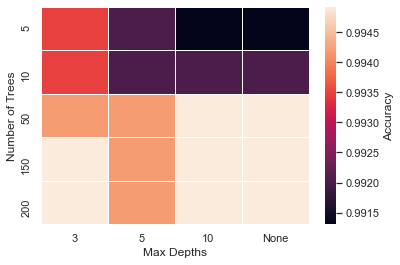

In [247]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x14 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x14.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
y14 = covid['Confirmed'].values

num_of_trees = [5,10,50,150,200]
max_depths = [3,5,10,None]
acc = []

for i, n_estimators in enumerate(num_of_trees):
    acc.append([])
    for max_depth in max_depths:
        ran4_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        outcome_kFold = cross_val_score(ran4_forest, x14, y14, cv=kFold)
        print("num_trees:",n_estimators,"\tmax_depth:", max_depth, "\tAccuracy:%.2f%%" % (outcome_kFold.mean()*100.0))
        acc[i].append(outcome_kFold.mean())

ax = sns.heatmap(acc, linewidth=0.5, cbar_kws={'label': 'Accuracy'},
    yticklabels=num_of_trees, xticklabels=['3','5','10','None'])

plt.xlabel('Max Depths')
plt.ylabel('Number of Trees')
plt.show()

### From the heatmap for Hybrid covid dataset, we note that the highest accuracy of 99.49% for "Confirmed" class is observed at Maximum depth = 10 or None, and number of trees = 150 or 200. We also observe that a relatively similar accuracy is obtained even at other number of trees (5, 10 and 50) and maximum depth = 3 for "Confirmed" class.

### Searching for best paramter for the Random Forest Classifier using GridSearchCV for "Confirmed" class in Hybrid dataset

In [248]:
rfc=RandomForestClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200],
               "criterion": ['gini', 'entropy']}
model_tree = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=0)
x14 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x14.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
grid = GridSearchCV(rfc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x14, covid['Confirmed'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [249]:
TrainedRFOutcome(grid = grid)

Best Accuracy: 
 0.9934782608695653

.........................

Optimum parameters 
 {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 10}

.........................

Optimum value of Max_depth 
 3
Best No. of Trees 
 10


# [CM5] Gradient Tree Boosting Classifier

In [250]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score

def TrainedGradBoostOutcome(grid):
    optimum_param = grid.best_estimator_.get_params()
    print("Best Accuracy: \n", grid.best_score_)
    print("\n.........................\n")
    print("Optimum parameters \n", grid.best_params_)
    print("\n.........................\n")
    print('Best No. of Trees \n', grid.best_params_['n_estimators'])

### Case Study 5: Using Original Covid Dataset

### Case Study 5a: For class "Recovered"

num_estimators: 5 	Accuracy: 82.25%
num_estimators: 10 	Accuracy: 92.39%
num_estimators: 50 	Accuracy: 97.32%
num_estimators: 150 	Accuracy: 97.83%
num_estimators: 200 	Accuracy: 97.90%


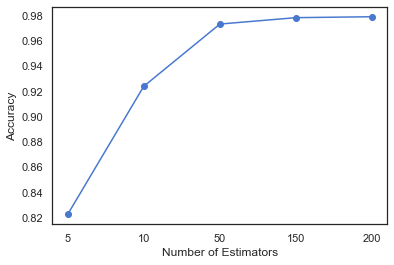

In [251]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x15 = scaled_covid.values
y15 = covid['Recovered'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad1_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad1_boost, x15, y15, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the maximum accuracy of around 97.9% is obtained at number of estimators = 150 or 200. 

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Recovered" class

In [252]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x15 = scaled_covid.values
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x15, covid['Recovered'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [253]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9644927536231884

.........................

Optimum parameters 
 {'max_depth': 5, 'n_estimators': 200}

.........................

Best No. of Trees 
 200


### Case Study 5b: For class "Deaths"

num_estimators: 5 	Accuracy: 91.59%
num_estimators: 10 	Accuracy: 94.64%
num_estimators: 50 	Accuracy: 96.16%
num_estimators: 150 	Accuracy: 96.16%
num_estimators: 200 	Accuracy: 95.94%


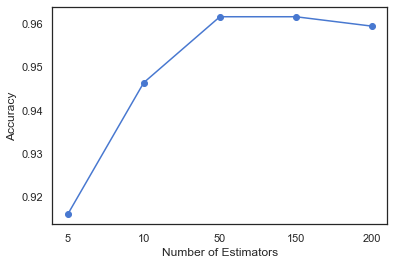

In [254]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x16 = scaled_covid.values
y16 = covid['Deaths'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad2_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad2_boost, x16, y16, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the highest accuracy of 96.16% is obtained at number of estimators = 50 and 150.

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Deaths" class

In [255]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x16 = scaled_covid.values
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x16, covid['Deaths'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [256]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9666666666666666

.........................

Optimum parameters 
 {'max_depth': 5, 'n_estimators': 50}

.........................

Best No. of Trees 
 50


### Case Study 5c: For class "Confirmed"

num_estimators: 5 	Accuracy: 98.91%
num_estimators: 10 	Accuracy: 99.20%
num_estimators: 50 	Accuracy: 99.13%
num_estimators: 150 	Accuracy: 99.13%
num_estimators: 200 	Accuracy: 99.13%


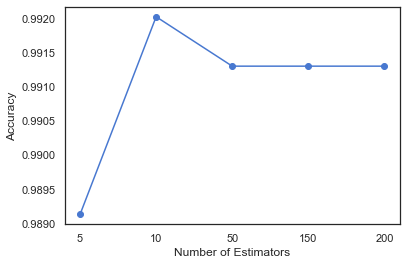

In [257]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x17 = scaled_covid.values
y17 = covid['Confirmed'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad3_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad3_boost, x17, y17, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the highest accuracy of 99.20% is obtained at number of estimators = 10.

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Confirmed" class

In [258]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x17 = scaled_covid.values
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x17, covid['Confirmed'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [259]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9942028985507246

.........................

Optimum parameters 
 {'max_depth': 5, 'n_estimators': 10}

.........................

Best No. of Trees 
 10


## Case Study 6: Using Hybrid Covid Dataset (PCA Features for Classification, 5 Principal Components)

### Case Study 6a: For class "Recovered"

num_estimators: 5 	Accuracy: 70.14%
num_estimators: 10 	Accuracy: 83.41%
num_estimators: 50 	Accuracy: 96.96%
num_estimators: 150 	Accuracy: 97.97%
num_estimators: 200 	Accuracy: 98.41%


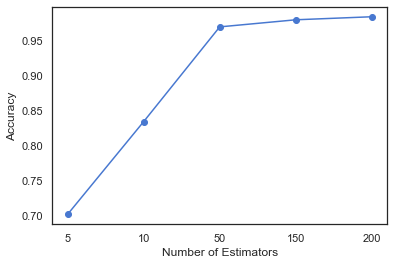

In [260]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x18 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x18.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
y18 = covid['Recovered'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad4_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad4_boost, x18, y18, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the highest accuracy of 98.41% is obtained at number of estimators = 200. We also observe, that there is a relatively matching accouracy at num_estimators: 150 as well.

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Recovered" class for Hybrid data

In [261]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x18 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x18.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x18, covid['Recovered'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [262]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9659420289855072

.........................

Optimum parameters 
 {'max_depth': 3, 'n_estimators': 150}

.........................

Best No. of Trees 
 150


### Case Study 6b: For class "Deaths"

num_estimators: 5 	Accuracy: 91.67%
num_estimators: 10 	Accuracy: 94.57%
num_estimators: 50 	Accuracy: 96.23%
num_estimators: 150 	Accuracy: 96.52%
num_estimators: 200 	Accuracy: 96.52%


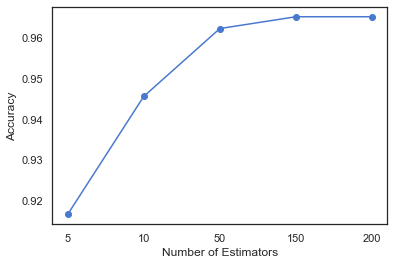

In [263]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x19 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x19.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
y19 = covid['Deaths'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad5_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad5_boost, x19, y19, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the highest accuracy of 96.52% is obtained at number of estimators = 150 and 200.

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Deaths" class for Hybrid data

In [264]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x19 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x19.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x19, covid['Deaths'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [265]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9615942028985508

.........................

Optimum parameters 
 {'max_depth': 3, 'n_estimators': 150}

.........................

Best No. of Trees 
 150


### Case Study 6c: For class "Confirmed"

num_estimators: 5 	Accuracy: 99.06%
num_estimators: 10 	Accuracy: 98.91%
num_estimators: 50 	Accuracy: 99.06%
num_estimators: 150 	Accuracy: 99.20%
num_estimators: 200 	Accuracy: 99.20%


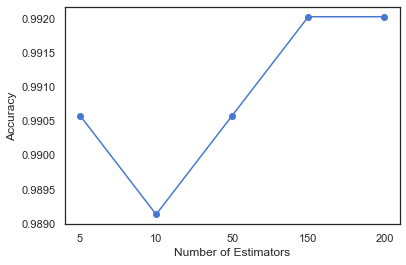

In [266]:
kFold = KFold(n_splits = 5, shuffle = True, random_state=0)
x20 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x20.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
y20 = covid['Confirmed'].values

num_of_estimators = [5,10,50,150,200]
acc = []

for n_estimators in num_of_estimators:
    grad6_boost = GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)
    outcome_kfold = cross_val_score(grad6_boost, x20, y20, cv=kFold)
    print("num_estimators:", n_estimators, "\tAccuracy: %.2f%%" %(outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())

    
plt.plot(range(len(num_of_estimators)),acc, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(num_of_estimators)), labels=num_of_estimators)
plt.show()

### From the above results, we can note that the highest accuracy of 99.20% is obtained at number of estimators = 150 and 200.

### Searching for best paramter for the Gradient Boosting Classifier using GridSearchCV for "Confirmed" class for Hybrid data

In [267]:
gbc=GradientBoostingClassifier(random_state=0)
params_grid = {"max_depth": [3, 5, 10, None],"n_estimators": [5,10,50,150,200]}
x20 = (pca_features_covid.iloc[:,0:5]).join(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']])
x20.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']
grid = GridSearchCV(gbc,param_grid = params_grid, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(x20, covid['Confirmed'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [5, 10, 50, 150, 200]},
             verbose=1)

### Finding the best hyperparameter

In [268]:
TrainedGradBoostOutcome(grid = grid)

Best Accuracy: 
 0.9927536231884059

.........................

Optimum parameters 
 {'max_depth': 3, 'n_estimators': 200}

.........................

Best No. of Trees 
 200


# [CM6] Naive Bayes Classifier

In [269]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

### Case Study 7a: For class "Recovered"

var_smoothing: 1e-10 	Accuracy: 68.41%
var_smoothing: 1e-09 	Accuracy: 68.41%
var_smoothing: 1e-05 	Accuracy: 68.41%
var_smoothing: 0.001 	Accuracy: 68.41%
var_smoothing: 0.1 	Accuracy: 69.20%


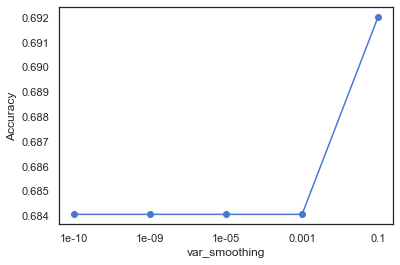

In [270]:
kFold = KFold(n_splits = 10, shuffle = True,random_state=0 )
x21 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].values
y21 = covid['Recovered'].values
var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
acc = []
for v_smoothing in var_smoothing:
    naive_model = GaussianNB(var_smoothing=v_smoothing)
    outcome_kfold = cross_val_score(naive_model, x21, y21, cv=kFold)
    print("var_smoothing:", v_smoothing, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
plt.plot(range(len(var_smoothing)),acc, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(var_smoothing)),labels=[str(i) for i in var_smoothing])
plt.show()

### From the plot, We see the highest accuracy of 69.20% with variance smoothing value of 0.1 when we exclude longitude and latitidue features. 

### Case Study 7b: For class "Deaths"

var_smoothing: 1e-10 	Accuracy: 57.10%
var_smoothing: 1e-09 	Accuracy: 57.10%
var_smoothing: 1e-05 	Accuracy: 57.10%
var_smoothing: 0.001 	Accuracy: 57.10%
var_smoothing: 0.1 	Accuracy: 63.41%


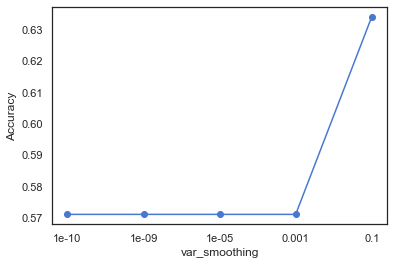

In [271]:
kFold = KFold(n_splits = 10, shuffle = True,random_state=0)
x22 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].values
y22 = covid['Deaths'].values
var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
acc = []
for v_smoothing in var_smoothing:
    naive_model = GaussianNB(var_smoothing=v_smoothing)
    outcome_kfold = cross_val_score(naive_model, x22, y22, cv=kFold)
    print("var_smoothing:", v_smoothing, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
plt.plot(range(len(var_smoothing)),acc, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(var_smoothing)),labels=[str(i) for i in var_smoothing])
plt.show()

### From the plot, We see the highest accuracy of 63.41% with variance smoothing value of 0.1 when we exclude longitude and latitidue features.

### Case Study 7c: For class "Confirmed"

var_smoothing: 1e-10 	Accuracy: 74.35%
var_smoothing: 1e-09 	Accuracy: 73.04%
var_smoothing: 1e-05 	Accuracy: 73.04%
var_smoothing: 0.001 	Accuracy: 73.70%
var_smoothing: 0.1 	Accuracy: 83.04%


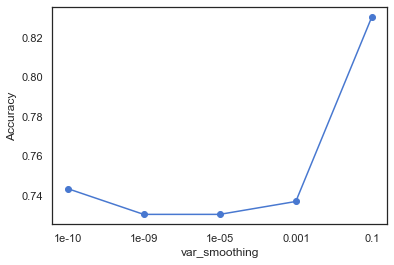

In [272]:
kFold = KFold(n_splits = 10, shuffle = True)
x23 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio']].values
y23 = covid['Confirmed'].values
var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
acc = []
for v_smoothing in var_smoothing:
    naive_model = GaussianNB(var_smoothing=v_smoothing)
    outcome_kfold = cross_val_score(naive_model, x23, y23, cv=kFold)
    print("var_smoothing:", v_smoothing, "\tAccuracy: %.2f%%" % (outcome_kfold.mean()*100.0))
    acc.append(outcome_kfold.mean())
plt.plot(range(len(var_smoothing)),acc, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(var_smoothing)),labels=[str(i) for i in var_smoothing])
plt.show()

### From the plot, We see the highest accuracy of around 83.19% with variance smoothing value of 0.1 when we exclude longitude and latitidue features. 

### Explanation: Impact of the smoothing parameter

#### We note from the above graphs that the covid dataset classification performance improves as we increase the var_smoothing parameter value. This shows that as the var_smoothing value increases, it smoothens the curve and also takes into account those samples which are farther from the distribution mean. We also know that Gaussian Naive Bayes works well for the ordinal datatypes and those features that could be fit into a gaussian distribution, thus these features work fairly well when compared to one-hot encoded and catagorical attributes.

### [CM7] Interpretability

### Case Study 8a: For Class "Recovered"

Accuracy: 0.6956521739130435
              precision    recall  f1-score   support

       False       0.71      0.25      0.37        99
        True       0.69      0.94      0.80       177

    accuracy                           0.70       276
   macro avg       0.70      0.60      0.59       276
weighted avg       0.70      0.70      0.65       276



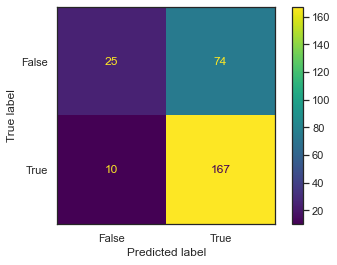

In [273]:
from sklearn import metrics
# Naive Bayes Classifier
x24_train, x24_test ,y24_train, y24_test = train_test_split(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']], covid['Recovered'], test_size=0.2,random_state=0, shuffle=True)
naive_model = GaussianNB(var_smoothing=0.1)
naive_model.fit(x24_train.values, y24_train.values)
y24_pred = naive_model.predict(x24_test.values)
print('Accuracy:', metrics.accuracy_score(y24_test.values,y24_pred))
metrics.plot_confusion_matrix(naive_model, x24_test, y24_test)
print(metrics.classification_report(y24_test,y24_pred))



Accuracy: 0.927536231884058
              precision    recall  f1-score   support

       False       0.89      0.91      0.90        99
        True       0.95      0.94      0.94       177

    accuracy                           0.93       276
   macro avg       0.92      0.92      0.92       276
weighted avg       0.93      0.93      0.93       276



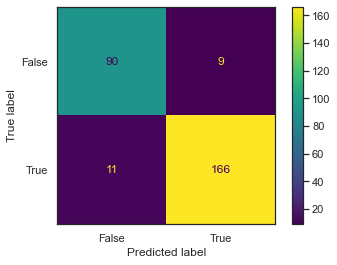

In [274]:
# Descison Tree Classifier
x25_train, x25_test ,y25_train, y25_test = train_test_split(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']], covid['Recovered'], test_size=0.2,random_state=0, shuffle=True)
dtree_model = DecisionTreeClassifier(max_depth=10, random_state=0)
dtree_model.fit(x25_train, y25_train)
y25_pred = dtree_model.predict(x25_test)
print('\n\nAccuracy:', metrics.accuracy_score(y25_test,y25_pred))
metrics.plot_confusion_matrix(dtree_model, x25_test, y25_test)
print(metrics.classification_report(y25_test,y25_pred))

### Case Study 8b: For class "Deaths"

Accuracy: 0.5652173913043478
              precision    recall  f1-score   support

       False       0.17      0.92      0.29        26
        True       0.99      0.53      0.69       250

    accuracy                           0.57       276
   macro avg       0.58      0.73      0.49       276
weighted avg       0.91      0.57      0.65       276



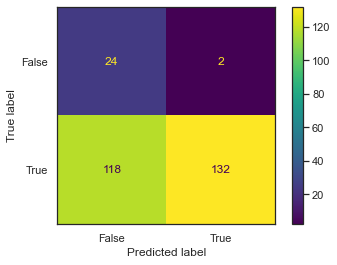

In [275]:
# Naive Bayes Classifier
x26_train, x26_test ,y26_train, y26_test = train_test_split(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']], covid['Deaths'], test_size=0.2,random_state=0, shuffle=True)
naive_model = GaussianNB(var_smoothing=0.1)
naive_model.fit(x26_train.values, y26_train.values)
y26_pred = naive_model.predict(x26_test.values)
print('Accuracy:', metrics.accuracy_score(y26_test.values,y26_pred))
metrics.plot_confusion_matrix(naive_model, x26_test, y26_test)
print(metrics.classification_report(y26_test,y26_pred))



Accuracy: 0.9311594202898551
              precision    recall  f1-score   support

       False       0.68      0.50      0.58        26
        True       0.95      0.98      0.96       250

    accuracy                           0.93       276
   macro avg       0.82      0.74      0.77       276
weighted avg       0.92      0.93      0.93       276



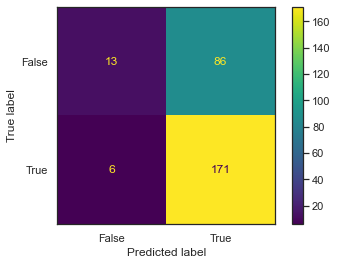

In [276]:
# Decision Tree Classifier
x27_train, x27_test ,y27_train, y27_test = train_test_split(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']], covid['Deaths'], test_size=0.2,random_state=0, shuffle=True)
dtree_model = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree_model.fit(x27_train, y27_train)
y27_pred = dtree_model.predict(x27_test)
print('\n\nAccuracy:', metrics.accuracy_score(y27_test,y27_pred))
metrics.plot_confusion_matrix(dtree_model, x27_test, y25_test)
print(metrics.classification_report(y27_test,y27_pred))

### Case Study 8c: For class "Confirmed"

Accuracy: 0.8152173913043478
              precision    recall  f1-score   support

       False       0.18      1.00      0.30        11
        True       1.00      0.81      0.89       265

    accuracy                           0.82       276
   macro avg       0.59      0.90      0.60       276
weighted avg       0.97      0.82      0.87       276



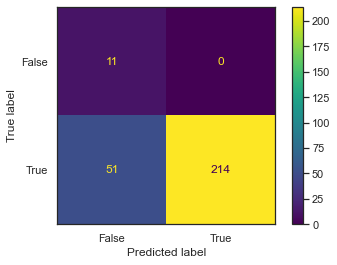

In [277]:
# Naive Bayes Classifier
x28_train, x28_test ,y28_train, y28_test = train_test_split(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']], covid['Confirmed'], test_size=0.2,random_state=22, shuffle=True)
naive_model = GaussianNB(var_smoothing=0.1)
naive_model.fit(x28_train.values, y28_train.values)
y28_pred = naive_model.predict(x28_test.values)
print('Accuracy:', metrics.accuracy_score(y28_test.values,y28_pred))
metrics.plot_confusion_matrix(naive_model, x28_test, y28_test)
print(metrics.classification_report(y28_test,y28_pred))



Accuracy: 0.9963768115942029
              precision    recall  f1-score   support

       False       0.89      1.00      0.94         8
        True       1.00      1.00      1.00       268

    accuracy                           1.00       276
   macro avg       0.94      1.00      0.97       276
weighted avg       1.00      1.00      1.00       276



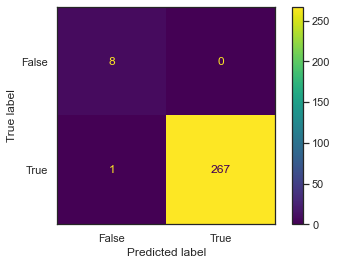

In [278]:
# Decision Tree Classifier
x29_train, x29_test ,y29_train, y29_test = train_test_split(scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']], covid['Confirmed'], test_size=0.2,random_state=0, shuffle=True)
dtree_model = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree_model.fit(x29_train, y29_train)
y29_pred = dtree_model.predict(x29_test)
print('\n\nAccuracy:', metrics.accuracy_score(y29_test,y29_pred))
metrics.plot_confusion_matrix(dtree_model, x29_test, y29_test)
print(metrics.classification_report(y29_test,y29_pred))

### Explain the performance of Naive Bayes classifier compared to the decision tree approaches

In [281]:
def plot_decision_boundaries(X, y, feature1, feature2, model_class,**model_params):

#This function aids in plotting the decision boundaries of a classification model.
#This uses just two columns of the data for fitting the model because we need to find the predicted value 
#for every point in scatter plot.

        #Arguments:
        #X: Feature data as a NumPy-type array.
        #y: Label data as a NumPy-type array.
        #model_class: A Scikit-learn Machine learning estimator class e.g. GaussianNB 
        #**model_params: Model parameters to be passed on to the Machine Learning estimator

    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
        
    # Reduces the entire dataset to the first two columns of data
    data_extracted = X[:, :2]
    
    # Ininitialize the model object
    build_model = model_class(**model_params)
    
    # Fits the model with the reduced data
    build_model.fit(data_extracted, y)
    
    # Step size of the mesh. Decrease to increase the quality.
    s = .02         # point within the mesh [x_min, m_max]x[y_min, y_max].
    
    
    # Plotting the decision boundary. For that, we will assign a color to each
    x_min, x_max = data_extracted[:, 0].min() - 1, data_extracted[:, 0].max() + 1
    y_min, y_max = data_extracted[:, 1].min() - 1, data_extracted[:, 1].max() + 1
    
    # Creating the Meshgrid 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, s), np.arange(y_min, y_max, s))
    
    # Obtaining the labels for each point in mesh using the model.
    P = build_model.predict(np.c_[xx.ravel(), yy.ravel()])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Predictions to obtain the classification results
    P = build_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    
    # Plotting
    plt.contourf(xx, yy, P, alpha=0.4,cmap=plt.cm.Spectral)
    scatter_graph = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8,cmap=plt.cm.Spectral)
    plt.xlabel(feature1,fontsize=15)
    plt.ylabel(feature2,fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(*scatter_graph.legend_elements())
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\akash\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

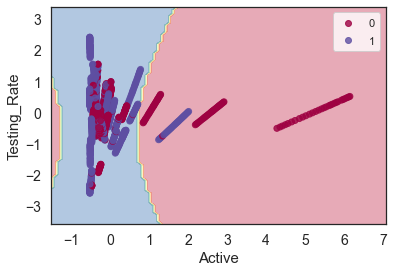

In [282]:
x30 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].values
y30 = covid['Recovered'].values
plot_decision_boundaries(x30, y30,'Active', 'Testing_Rate',GaussianNB, var_smoothing=0.1)

<module 'matplotlib.pyplot' from 'C:\\Users\\akash\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

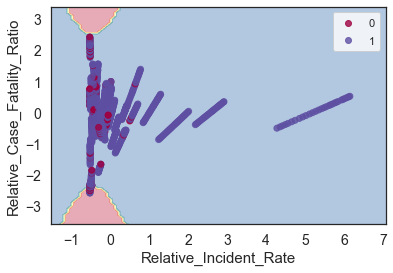

In [283]:
x31 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].values
y31 = covid['Deaths'].values
plot_decision_boundaries(x31, y31,'Relative_Incident_Rate', 'Relative_Case_Fatality_Ratio',GaussianNB, 
                         var_smoothing=0.1)

<module 'matplotlib.pyplot' from 'C:\\Users\\akash\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

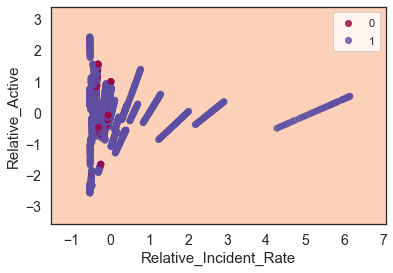

In [284]:
x32 = scaled_covid[['Active', 'Incident_Rate', 'Total_Test_Results', 
                   'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census',
                  'SexRatio', 'Relative_Active', 'Relative_Incident_Rate', 'Relative_Total_Test_Results',
                  'Relative_Case_Fatality_Ratio', 'Relative_Testing_Rate']].values
y32 = covid['Confirmed'].values
plot_decision_boundaries(x32, y32,'Relative_Incident_Rate', 'Relative_Active',GaussianNB, var_smoothing=0.1)

In [ ]:
# Initializing Classifiers
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

%matplotlib inline  
gs = gridspec.GridSpec(3, 2)

clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier()

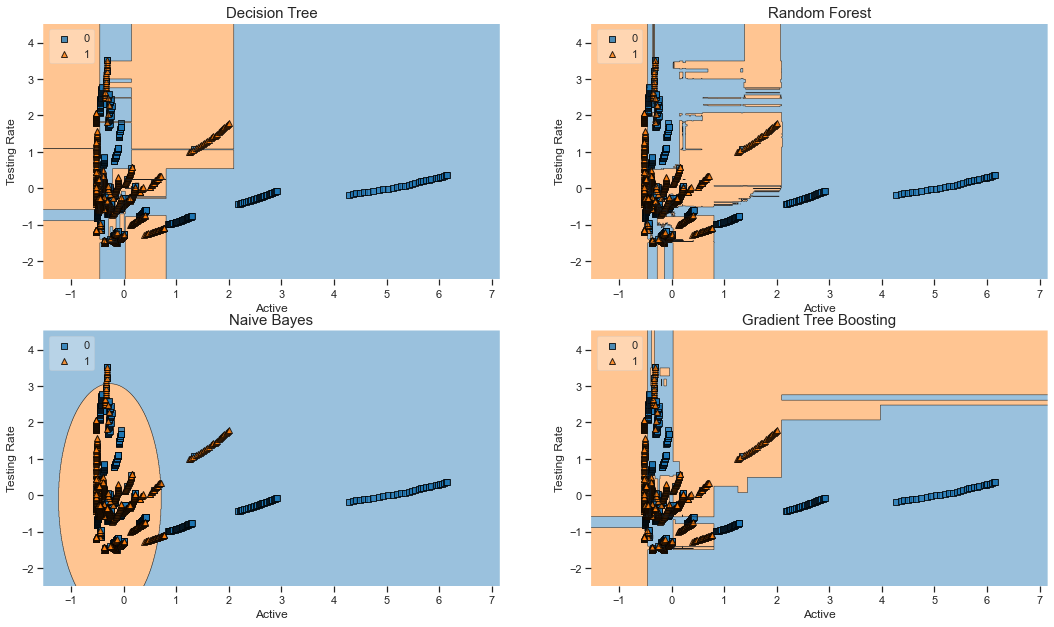

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline  
gs = gridspec.GridSpec(3, 2)

x33 = scaled_covid[['Active', 'Testing_Rate']].values
y33 = covid['Recovered'].values.astype(int)

fig = plt.figure(figsize=(18,16))
labels = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Tree Boosting']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],labels,[(0,0), (0,1), (1,0), (1,1)]):
    clf.fit(x33, y33)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x33, y=y33, clf=clf, legend=2)
    plt.xlabel('Active')
    plt.ylabel('Testing Rate')
    plt.title(lab, fontsize=15)
plt.show()

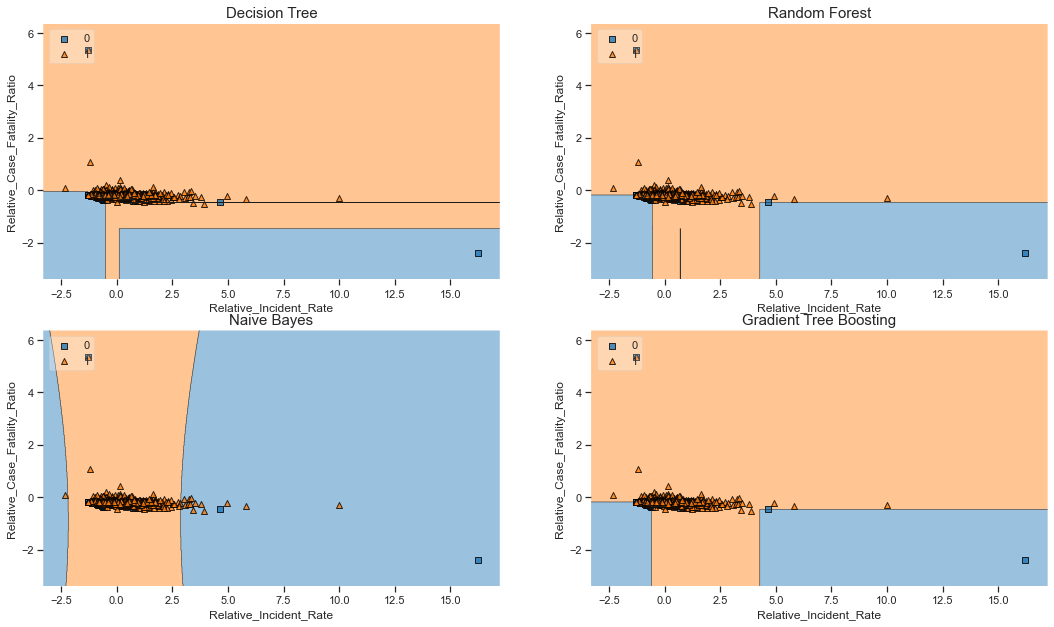

In [ ]:
x34 = scaled_covid[['Relative_Incident_Rate', 'Relative_Case_Fatality_Ratio']].values
y34 = covid['Deaths'].values.astype(int)

fig = plt.figure(figsize=(18,16))
labels = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Tree Boosting']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],labels,[(0,0), (0,1), (1,0), (1,1)]):
    clf.fit(x34, y34)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x34, y=y34, clf=clf, legend=2)
    plt.xlabel('Relative_Incident_Rate')
    plt.ylabel('Relative_Case_Fatality_Ratio')
    plt.title(lab, fontsize=15)
plt.show()

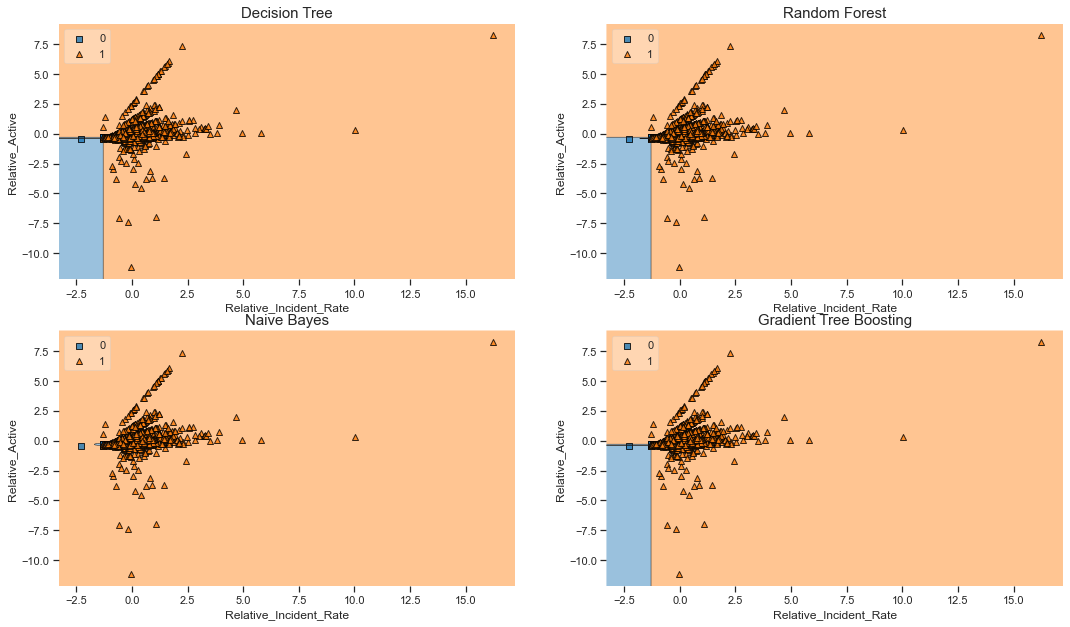

In [ ]:
x35 = scaled_covid[['Relative_Incident_Rate', 'Relative_Active']].values
y35 = covid['Confirmed'].values.astype(int)

fig = plt.figure(figsize=(18,16))
labels = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Tree Boosting']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],labels,[(0,0), (0,1), (1,0), (1,1)]):
    clf.fit(x35, y35)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x35, y=y35, clf=clf, legend=2)
    plt.xlabel('Relative_Incident_Rate')
    plt.ylabel('Relative_Active')
    plt.title(lab, fontsize=15)
plt.show()

### [CM8] Kaggle Submission

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#loading test dataset
covid_test = pd.read_csv("dkmacovid_kaggletest_features.csv")

In [ ]:
#Type-casting the population and population density data into float data type
covid_test[['Resident Population 2020 Census', 'Population Density 2020 Census']] = covid_test[['Resident Population 2020 Census', 
                                                                                      'Population Density 2020 Census']].replace({",":""},
                                                                                       regex=True).apply(pd.to_numeric,1)

In [ ]:
# Getting the relative difference values for specific quantitative attributes with respect to the state as done 
#for the traning dataset

covid_test = ReativeFeature(covid_test, 'Active')
covid_test = ReativeFeature(covid_test, 'Case_Fatality_Ratio')
covid_test = ReativeFeature(covid_test, 'Incident_Rate')
covid_test = ReativeFeature(covid_test, 'Total_Test_Results')
covid_test = ReativeFeature(covid_test, 'Testing_Rate')

covid_test

Id  Day  State ID       State      Lat     Long_  Active  Incident_Rate  \
0      0    2        14    Illinois  40.3495  -88.9861  957138    7697.015291   
1      5    3        14    Illinois  40.3495  -88.9861  961499    7732.282519   
2     10    4        14    Illinois  40.3495  -88.9861  966468    7772.205747   
3     15    5        14    Illinois  40.3495  -88.9861  973157    7826.175891   
4     20    6        14    Illinois  40.3495  -88.9861  980553    7885.906848   
..   ...  ...       ...         ...      ...       ...     ...            ...   
145  129   27        48  Washington  47.4009 -121.4905  301078    4009.104264   
146  134   28        48  Washington  47.4009 -121.4905  303566    4042.197310   
147  139   29        48  Washington  47.4009 -121.4905  305516    4068.356574   
148  144   30        48  Washington  47.4009 -121.4905  307312    4091.941935   
149  149   31        48  Washington  47.4009 -121.4905  307312    4091.941935   

     Total_Test_Results  Case_Fatality_Ratio  Testing_Rate  \
0              13436652             1.867428  106035.68340   
1              13482117             1.869933  106394.47160   
2              13530371             1.869466  106775.26930   
3              13617454             1.871700  107462.48700   
4              13698428             1.874835  108101.49540   
..                  ...                  ...           ...   
145             4446844             1.379349   58396.67084   
146             4470215             1.378452   58703.58257   
147             4495463             1.383146   59035.14337   
148             4524221             1.375174   59412.79805   
149             4548239             1.375174   59728.20629   

     Resident Population 2020 Census  Population Density 2020 Census  \
0                         12812508.0                           230.8   
1                         12812508.0                           230.8   
2                         12812508.0                           230.8   
3                         12812508.0                           230.8   
4                         12812508.0                           230.8   
..                               ...                             ...   
145                        7705281.0                           115.9   
146                        7705281.0                           115.9   
147                        7705281.0                           115.9   
148                        7705281.0                           115.9   
149                        7705281.0                           115.9   

     Density Rank 2020 Census  SexRatio  Relative_Active  \
0                          14        97              1.0   
1                          14        97           4361.0   
2                          14        97           4969.0   
3                          14        97           6689.0   
4                          14        97           7396.0   
..                        ...       ...              ...   
145                        24       100           1763.0   
146                        24       100           2488.0   
147                        24       100           1950.0   
148                        24       100           1796.0   
149                        24       100              0.0   

     Relative_Case_Fatality_Ratio  Relative_Incident_Rate  \
0                        1.000000                1.000000   
1                        0.002505               35.267228   
2                       -0.000467               39.923228   
3                        0.002233               53.970144   
4                        0.003135               59.730957   
..                            ...                     ...   
145                      0.006285               23.729814   
146                     -0.000897               33.093046   
147                      0.004694               26.159264   
148                     -0.007972               23.585361   
149                      0.0000

In [ ]:
#dropping certain columns as done in the training dataset
covid_test_update = covid_test[covid_test.columns.difference(['Lat', 'Long_', 'Id', 'State'])]
covid_test_update.dtypes

Active                               int64
Case_Fatality_Ratio                float64
Day                                  int64
Density Rank 2020 Census             int64
Incident_Rate                      float64
Population Density 2020 Census     float64
Relative_Active                    float64
Relative_Case_Fatality_Ratio       float64
Relative_Incident_Rate             float64
Relative_Testing_Rate              float64
Relative_Total_Test_Results        float64
Resident Population 2020 Census    float64
SexRatio                             int64
State ID                             int64
Testing_Rate                       float64
Total_Test_Results                   int64
dtype: object

In [ ]:
columns = covid_test_update.columns
scaled_X = scaler.transform(covid_test_update.values)
covid_test_update = pd.DataFrame(scaled_X)
covid_test_update.columns = columns
covid_test_update.head()

Active  Case_Fatality_Ratio       Day  Density Rank 2020 Census  \
0  1.630365             1.718143 -1.675247                 -1.392419   
1  1.642290             1.729474 -1.559712                 -1.392419   
2  1.655878             1.727361 -1.444178                 -1.392419   
3  1.674170             1.737463 -1.328644                 -1.392419   
4  1.694395             1.751645 -1.213110                 -1.392419   

   Incident_Rate  Population Density 2020 Census  Relative_Active  \
0      -0.034670                        1.605706        -0.410182   
1      -0.019131                        1.605706         0.717905   
2      -0.001540                        1.605706         0.875217   
3       0.022241                        1.605706         1.320242   
4       0.048560                        1.605706         1.503168   

   Relative_Case_Fatality_Ratio  Relative_Incident_Rate  \
0                      5.375847               -1.643657   
1                     -0.182509               -0.409462   
2                     -0.199070               -0.241768   
3                     -0.184024                0.264156   
4                     -0.178997                0.471642   

   Relative_Testing_Rate  Relative_Total_Test_Results  \
0              -1.436507                    -1.044578   
1              -0.020155                    -0.095284   
2               0.066973                    -0.037049   
3               1.279977                     0.773706   
4               1.089134                     0.646149   

   Resident Population 2020 Census  SexRatio  State ID  Testing_Rate  \
0                         0.094176 -0.559017 -1.283315      1.252685   
1                         0.094176 -0.559017 -1.283315      1.265333   
2                         0.094176 -0.559017 -1.283315      1.278757   
3                         0.094176 -0.559017 -1.283315      1.302983   
4                         0.094176 -0.559017 -1.283315      1.325509   

   Total_Test_Results  
0            0.874530  
1            0.882366  
2            0.890682  
3            0.905691  
4            0.919647

In [ ]:
covid_test_update.shape

(150, 16)

In [ ]:
covid_test_pca = pca_covid_data.transform(covid_test_update)
print(covid_test_pca.shape)

(150, 10)


In [ ]:
#Making the hybrid test dataset by using covid_test_update along with first 5 PCA components.

x = covid_test_pca[:, 0].tolist()
covid_test_update.loc[:, 'PCA1'] = x
x = covid_test_pca[:, 1].tolist()
covid_test_update.loc[:, 'PCA2'] = x
x = covid_test_pca[:, 2].tolist()
covid_test_update.loc[:, 'PCA3'] = x
x = covid_test_pca[:, 3].tolist()
covid_test_update.loc[:, 'PCA4'] = x
x = covid_test_pca[:, 4].tolist()
covid_test_update.loc[:, 'PCA5'] = x

In [ ]:
recovered_labels = covid['Recovered']
confirmed_labels = covid['Confirmed']
deaths_labels = covid['Deaths']

### For "Recovered" class

In [ ]:
covid_test_update.shape

(150, 21)

In [ ]:
rec_cl = XGBClassifier()
rec_cl.fit(features_hybrid, covid['Recovered'])
recovered_test_predict = rec_cl.predict(covid_test_update)
recovered_test_predict = pd.DataFrame(recovered_test_predict)[0].map({True: 1, False: 0})
print(classification_report(recovered_labels, rec_cl.predict(features_hybrid)))
print("AUC Score: {0:.4f}\n".format(roc_auc_score(recovered_labels, rec_cl.predict(features_hybrid))))

/Users/snigdhakakkar/opt/anaconda2/envs/p36workshop/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:43:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       516
        True       1.00      1.00      1.00       864

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380

AUC Score: 1.0000



### For "Confirmed" class

In [ ]:
confirm_cl = XGBClassifier()
confirm_cl.fit(features_hybrid, covid['Confirmed'])
confirm_test_predict = confirm_cl.predict(covid_test_update)
confirm_test_predict = pd.DataFrame(confirm_test_predict)[0].map({True: 1, False: 0})
print(classification_report(confirmed_labels, confirm_cl.predict(features_hybrid)))
print("AUC Score: {0:.4f}\n".format(roc_auc_score(confirmed_labels, confirm_cl.predict(features_hybrid))))

/Users/snigdhakakkar/opt/anaconda2/envs/p36workshop/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:44:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        51
        True       1.00      1.00      1.00      1329

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380

AUC Score: 1.0000



### For "Deaths" class

In [ ]:
death_cl = XGBClassifier()
death_cl.fit(features_hybrid, covid['Deaths'])
death_test_predict = death_cl.predict(covid_test_update)
death_test_predict = pd.DataFrame(death_test_predict)[0].map({True: 1, False: 0})
print(classification_report(deaths_labels, death_cl.predict(features_hybrid)))
print("AUC Score: {0:.4f}\n".format(roc_auc_score(deaths_labels, death_cl.predict(features_hybrid))))

/Users/snigdhakakkar/opt/anaconda2/envs/p36workshop/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:45:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       136
        True       1.00      1.00      1.00      1244

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380

AUC Score: 1.0000



In [ ]:
kaggle_output = pd.DataFrame({
    'Id': covid_test.Id,
    'Confirmed': confirm_test_predict,
    'Deaths': death_test_predict,
    'Recovered': recovered_test_predict
})

In [ ]:
#kaggle_output.to_csv("dkma_output_submit.csv", index=False)